In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib_venn import venn2_unweighted, venn3_unweighted 
from venn import venn
import seaborn as sns
import numpy as np
import random
import statistics as stats
import scipy.interpolate
from scipy.ndimage.filters import gaussian_filter1d
import math
import wesanderson
plt.rcParams['figure.figsize']= 8,4
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

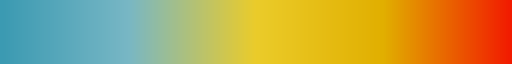

In [3]:
tmp=wesanderson.film_palette("the life acquatic")
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["cornflowerblue",tmp[2],"tomato"])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tmp)
cmap

In [4]:
pp=PdfPages("final.filter.pdf")

df=pd.read_csv("samtools.flagstats.tsv", sep='\t')
df["reads_numb"]=df["read1"]+df["read2"]
LIBR=pd.read_csv("libraries.txt", sep='\t')
df=LIBR[["IND"]].merge(df,left_on="IND",right_on="sample_prefix")
df=df.drop(columns=['IND'])
df["LIBRARY"]=LIBR["LIBRARY"]
df=df.sort_values(by='sample_prefix')
df=df.reset_index(drop=True)

df[["sample_prefix","pop"]].to_csv('popmap.filt0.tsv', sep="\t", index=False)
df[["sample_prefix","LIBRARY"]].to_csv('libmap.filt0.tsv', sep="\t", index=False)
df

,sample_prefix,pop,total,secondary,supplementary,duplicates,mapped,mapped.perc,paired,read1,read2,properly_paired,properly_paired.perc,both_mapped,singletons,singletons.perc,different_chr,different_chr_mapQ>=5,reads_numb,LIBRARY
0,01b_01,01b,110765,0,3231,0,109183,98.57,107534,53767,53767,100182,93.16,105328,624,0.58,4496,3705,107534,Library2
1,01b_02,01b,3644971,0,93627,0,3607519,98.97,3551344,1775672,1775672,3409068,95.99,3504878,9014,0.25,75820,50009,3551344,Library2
2,01b_03,01b,1624728,0,50446,0,1610142,99.10,1574282,787141,787141,1498786,95.20,1554904,4792,0.30,45564,35392,1574282,Library2
3,01b_04,01b,28956,0,1150,0,28361,97.95,27806,13903,13903,24962,89.77,27022,189,0.68,1966,1721,27806,Library2
4,01b_05,01b,2186608,0,66974,0,2163356,98.94,2119634,1059817,1059817,2010600,94.86,2089286,7096,0.33,64664,48893,2119634,Library2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,27b_40,27b,1352869,0,19113,0,1342585,99.24,1333756,666878,666878,1303206,97.71,1322318,1154,0.09,16214,13280,1333756,Library4
1369,27b_42,27b,343343,0,3433,0,339483,98.88,339910,169955,169955,332916,97.94,335652,398,0.12,2446,1893,339910,Library4
1370,27b_43,27b,393809,0,6297,0,391342,99.37,387512,193756,193756,377248,97.35,384666,379,0.10,7032,5554,387512,Library4
1371,27b_48,27b,727075,0,13277,0,720514,99.10,713798,356899,356899,690478,96.73,706458,779,0.11,14856,12575,713798,Library4


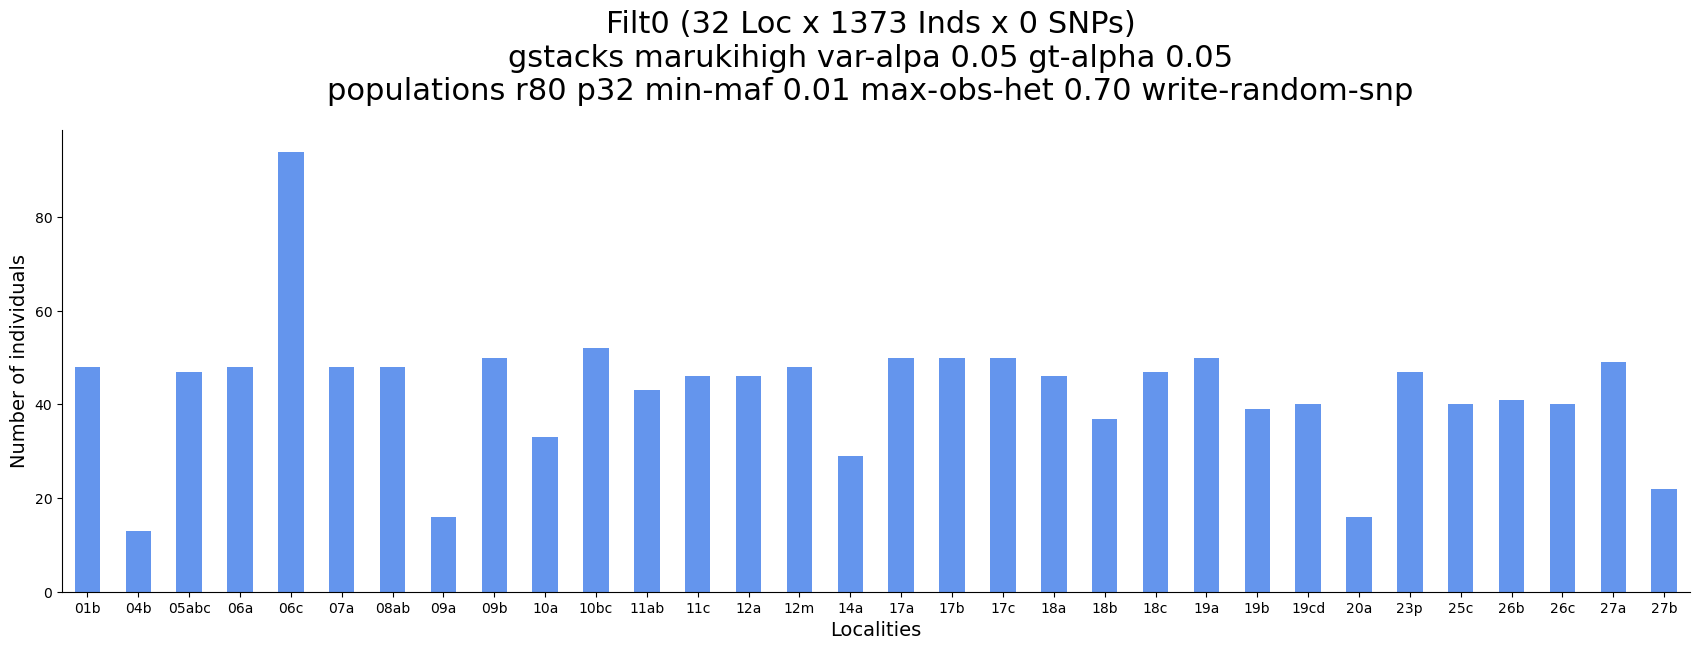

In [6]:
POP=[]
INDNUMB=[]
for pop in np.unique(df["pop"]):
    POP.append(pop)
    INDNUMB.append(len(df[df["pop"]==pop]))
d={"POP":POP, "INDNUMB":INDNUMB}
df1=pd.DataFrame(d)
fig,ax=plt.subplots()
fig.set_size_inches(21,6)
df1.plot(x="POP",y="INDNUMB",kind='bar',color='cornflowerblue',legend=False,ax=ax)
ax.set_title('',size=20)
ax.set_ylabel('Number of individuals',size=14)
ax.set_xlabel('Localities',size=14)
ax.tick_params(axis='x', rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.suptitle("Filt0 (32 Loc x 1373 Inds x 0 SNPs)\ngstacks marukihigh var-alpa 0.05 gt-alpha 0.05\n" + 
             "populations r80 p32 min-maf 0.01 max-obs-het 0.70 write-random-snp",
             x=0.51, y=1.08, size=22)
pp.savefig(fig)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


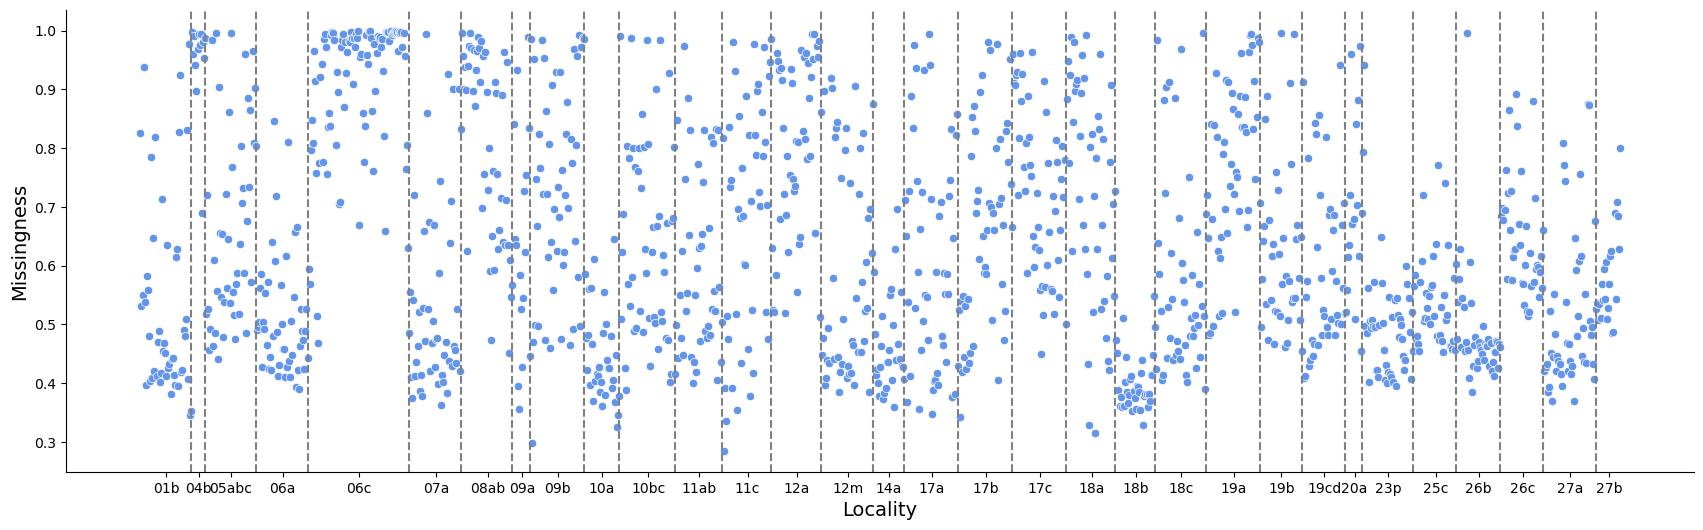

In [7]:
df_imiss=pd.read_csv("filt0.imiss", sep='\t')
df_imiss=df_imiss[["INDV","F_MISS"]]
df_imiss["POP"]="01"
for i in range(0,len(df_imiss)):
    df_imiss["POP"][i]=df_imiss["INDV"][i].split("_")[0]

fig,ax=plt.subplots()
fig.set_size_inches(21,6)
sns.scatterplot(data=df_imiss,x="INDV",y="F_MISS",color="cornflowerblue",ax=ax)
ax.set_xlabel('Locality',size=14)
ax.set_ylabel('Missingness',size=14)
ax.legend().remove()
vline_pos=df_imiss.tail(1)["INDV"]
xtick_pos=df_imiss.iloc[[int(len(df_imiss)/2)]]["INDV"]
for i in np.unique(df_imiss["POP"]):
    tmp=df_imiss[df_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax.axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_imiss["POP"])
    ax.set_xticks(xtick_pos, xtick_lab)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

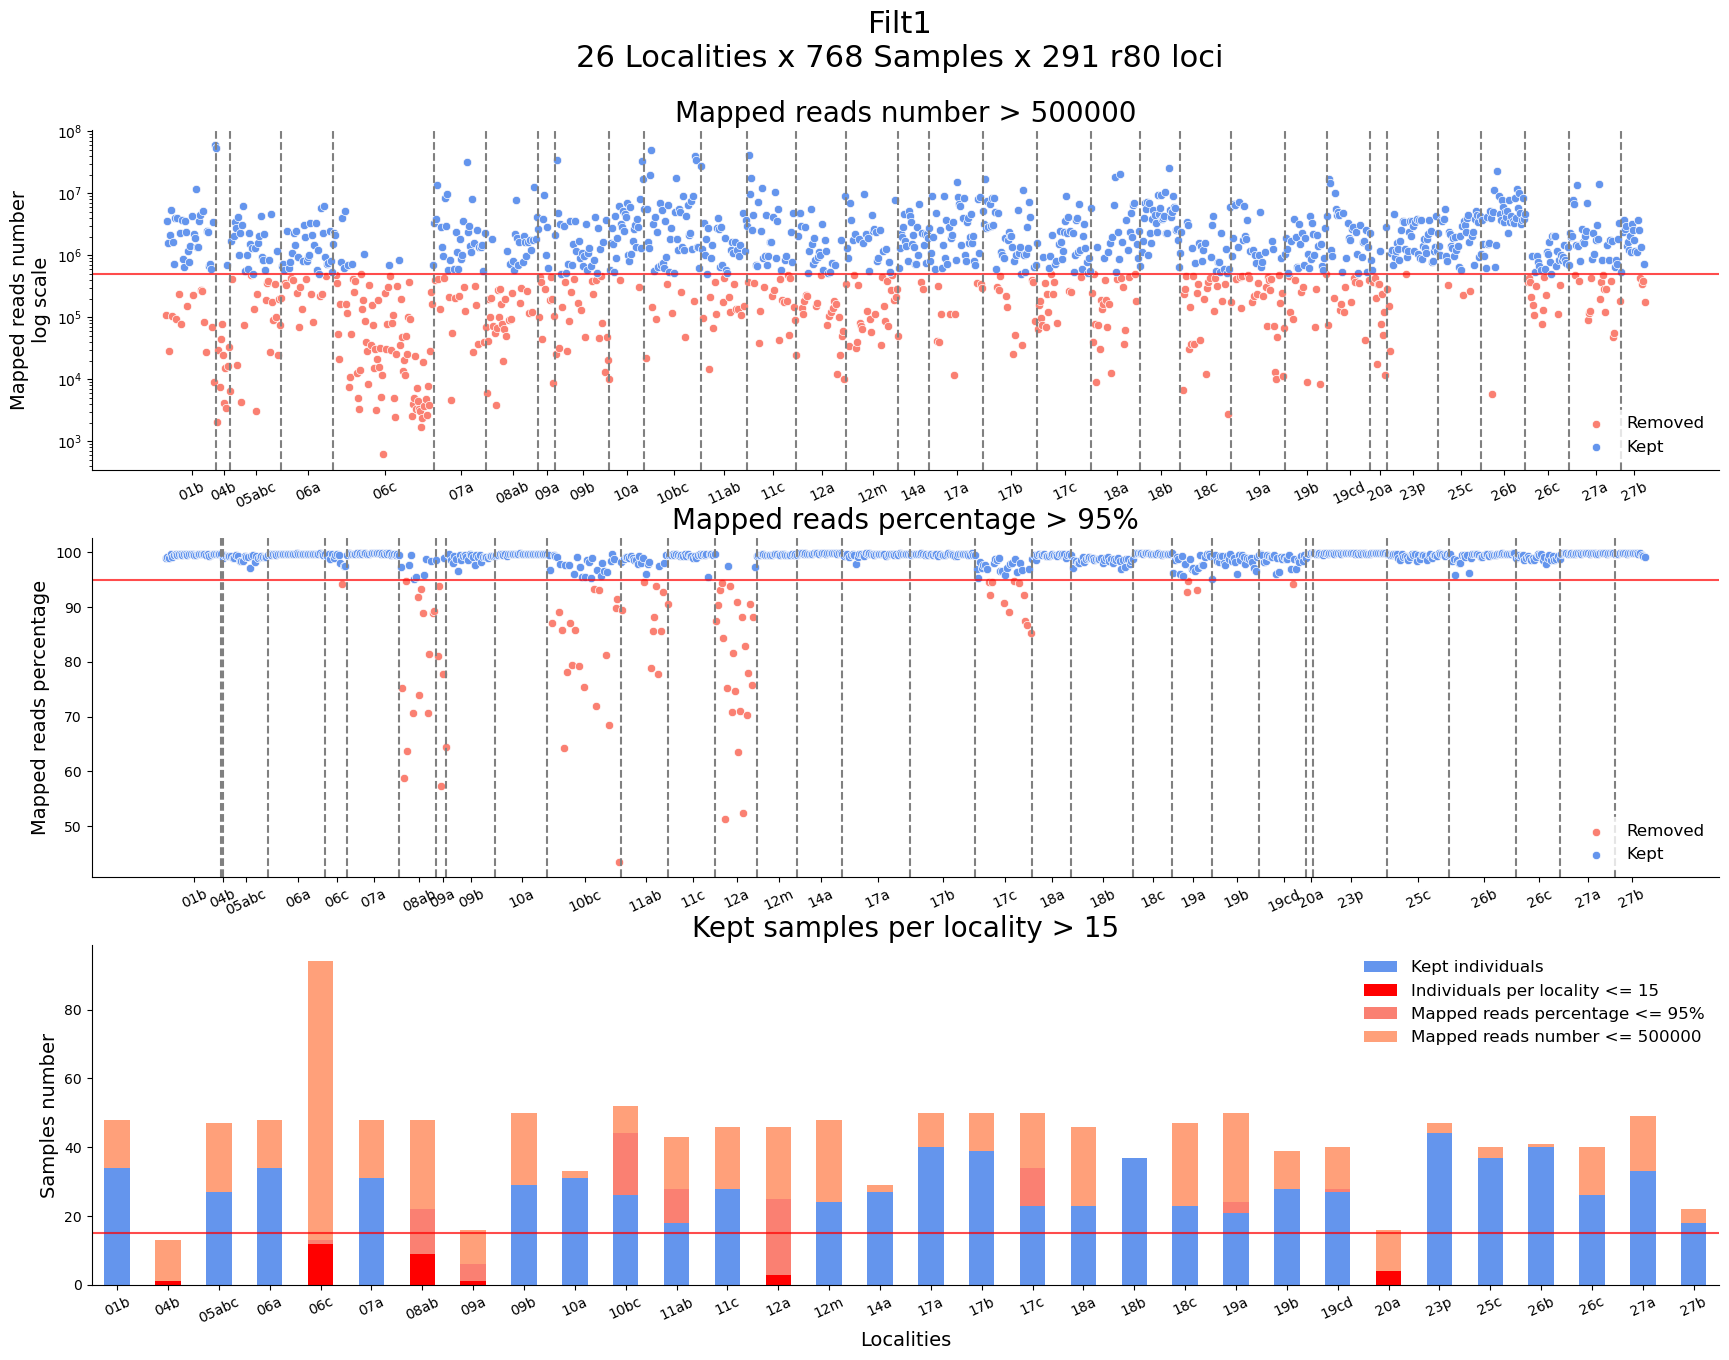

In [8]:
#filt1
#mapped reads number >=500k
#mapped reads percentage >=95%
#individual count per pop <=15

df_filt1a=df[df["mapped"]>=500000]
df_filt1b=df_filt1a[df_filt1a["mapped.perc"]>=95]
df_filt1b=df_filt1b.reset_index(drop=True)
df_filt1=df_filt1b[df_filt1b["pop"]!="04b"]
df_filt1=df_filt1[df_filt1["pop"]!="06c"]
df_filt1=df_filt1[df_filt1["pop"]!="08ab"]
df_filt1=df_filt1[df_filt1["pop"]!="09a"]
df_filt1=df_filt1[df_filt1["pop"]!="12a"]
df_filt1=df_filt1[df_filt1["pop"]!="20a"]
df_filt1=df_filt1.reset_index(drop=True)

fig,ax=plt.subplots(3,1)
fig.set_size_inches(21,15)
sns.scatterplot(data=df,x=df["sample_prefix"],y=df["mapped"],color="salmon",label="Removed",ax=ax[0])
sns.scatterplot(data=df_filt1a,x=df_filt1a["sample_prefix"],y=df_filt1a["mapped"],
                color="cornflowerblue",label="Kept",ax=ax[0])
ax[0].set_title('Mapped reads number > 500000',size=20)
ax[0].set_xlabel('',size=14)
ax[0].set_ylabel('Mapped reads number\nlog scale',size=14)
ax[0].set_yscale("log")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].axhline(500000, color="red", alpha=0.7)
ax[0].legend(loc="lower right", fontsize=12, edgecolor="white")
vline_pos=df.tail(1).sample_prefix
xtick_pos=df.iloc[[int(len(df)/2)]].sample_prefix
for i in np.unique(df["pop"]):
    tmp=df[df["pop"]==i]
    vline_pos=vline_pos.append(tmp.tail(1).sample_prefix)
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]].sample_prefix)
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax[0].axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df["pop"])
    ax[0].set_xticks(xtick_pos, xtick_lab, rotation=25)

sns.scatterplot(data=df_filt1a,x=df_filt1a["sample_prefix"],y=df_filt1a["mapped.perc"],
                color="salmon",label="Removed",ax=ax[1])
sns.scatterplot(data=df_filt1b,x=df_filt1b["sample_prefix"],y=df_filt1b["mapped.perc"],
                color="cornflowerblue",label="Kept",ax=ax[1])
ax[1].set_title('Mapped reads percentage > 95%',size=20)
ax[1].set_xlabel('',size=14)
ax[1].set_ylabel('Mapped reads percentage',size=14)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend(loc="lower right", fontsize=12, edgecolor="white")
ax[1].axhline(95, color="red", alpha=0.7)
vline_pos=df_filt1a.tail(1).sample_prefix
xtick_pos=df_filt1a.iloc[[int(len(df_filt1a)/2)]].sample_prefix
for i in np.unique(df_filt1a["pop"]):
    tmp=df_filt1a[df_filt1a["pop"]==i]
    vline_pos=vline_pos.append(tmp.tail(1).sample_prefix)
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]].sample_prefix)
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax[1].axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt1a["pop"])
    ax[1].set_xticks(xtick_pos, xtick_lab, rotation=25)

population=[]
starting_individuals=[]
filt1a_removed=[]
filt1b_removed=[]
filt1_removed=[]
kept_individuals=[]
for pop in np.unique(df["pop"]):
    population.append(pop)
    start=len(df[df["pop"]==pop])
    starting_individuals.append(start)
    filt1a=len(df_filt1a[df_filt1a["pop"]==pop])
    filt1a_removed.append(start-filt1a)
    filt1b=len(df_filt1b[df_filt1b["pop"]==pop])
    filt1b_removed.append(filt1a-filt1b)
    filt1=len(df_filt1[df_filt1["pop"]==pop])
    filt1_removed.append(filt1b-filt1)
    kept_individuals.append(filt1)
d = {'Populations': population, 'Kept individuals': kept_individuals,
     'Individuals per locality <= 15': filt1_removed, 'Mapped reads percentage <= 95%': filt1b_removed,
     'Mapped reads number <= 500000': filt1a_removed}
ds = pd.DataFrame(data=d)
ds.plot(x="Populations",kind='bar',stacked=True,color=['cornflowerblue','red','salmon','lightsalmon'],
        ax=ax[2])
ax[2].set_title('Kept samples per locality > 15',size=20)
ax[2].set_ylabel('Samples number',size=14)
ax[2].set_xlabel('Localities',size=14)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(axis='x', rotation=25)
ax[2].axhline(15, color="red", alpha=0.7)
ax[2].legend(loc="upper right", fontsize=12, edgecolor="white")

plt.suptitle("Filt1\n26 Localities x 768 Samples x 291 r80 loci",
             x=0.51, y=0.96, size=22)
#plt.show()
pp.savefig(fig)

In [1]:
df_filt1_imiss=pd.read_csv("filt1.imiss", sep='\t')
df_filt1_imiss=df_filt1_imiss[["INDV","F_MISS"]]
df_filt1_imiss["POP"]="01"
for i in range(0,len(df_filt1_imiss)):
    df_filt1_imiss["POP"][i]=df_filt1_imiss["INDV"][i].split("_")[0]
df_filt1_imiss["LIBRARY"]=df_filt1["LIBRARY"]

fig,ax=plt.subplots(1,5,sharey=True)
fig.set_size_inches(21,6)
counter=0
for i in ["Library1","Library2","Library3","Library4","Library5"]:
    tmp=df_filt1_imiss[df_filt1_imiss["LIBRARY"]==i]
    sns.boxplot(data=tmp,x="POP",y="F_MISS", color="cornflowerblue", linecolor="black", showfliers=False, ax=ax[counter])
    sns.stripplot(data=tmp,x="POP",y="F_MISS",color="black", jitter=0.1, size=2, ax=ax[counter])
    ax[counter].set_xlabel(i,size=14)
    ax[counter].set_xticklabels(np.unique(tmp["POP"]), rotation = 30)
    ax[counter].spines['top'].set_visible(False)
    ax[counter].spines['right'].set_visible(False)
    counter=counter+1
ax[0].set_ylabel('r80 loci missingness',size=14)
plt.show()

NameError: name 'pd' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


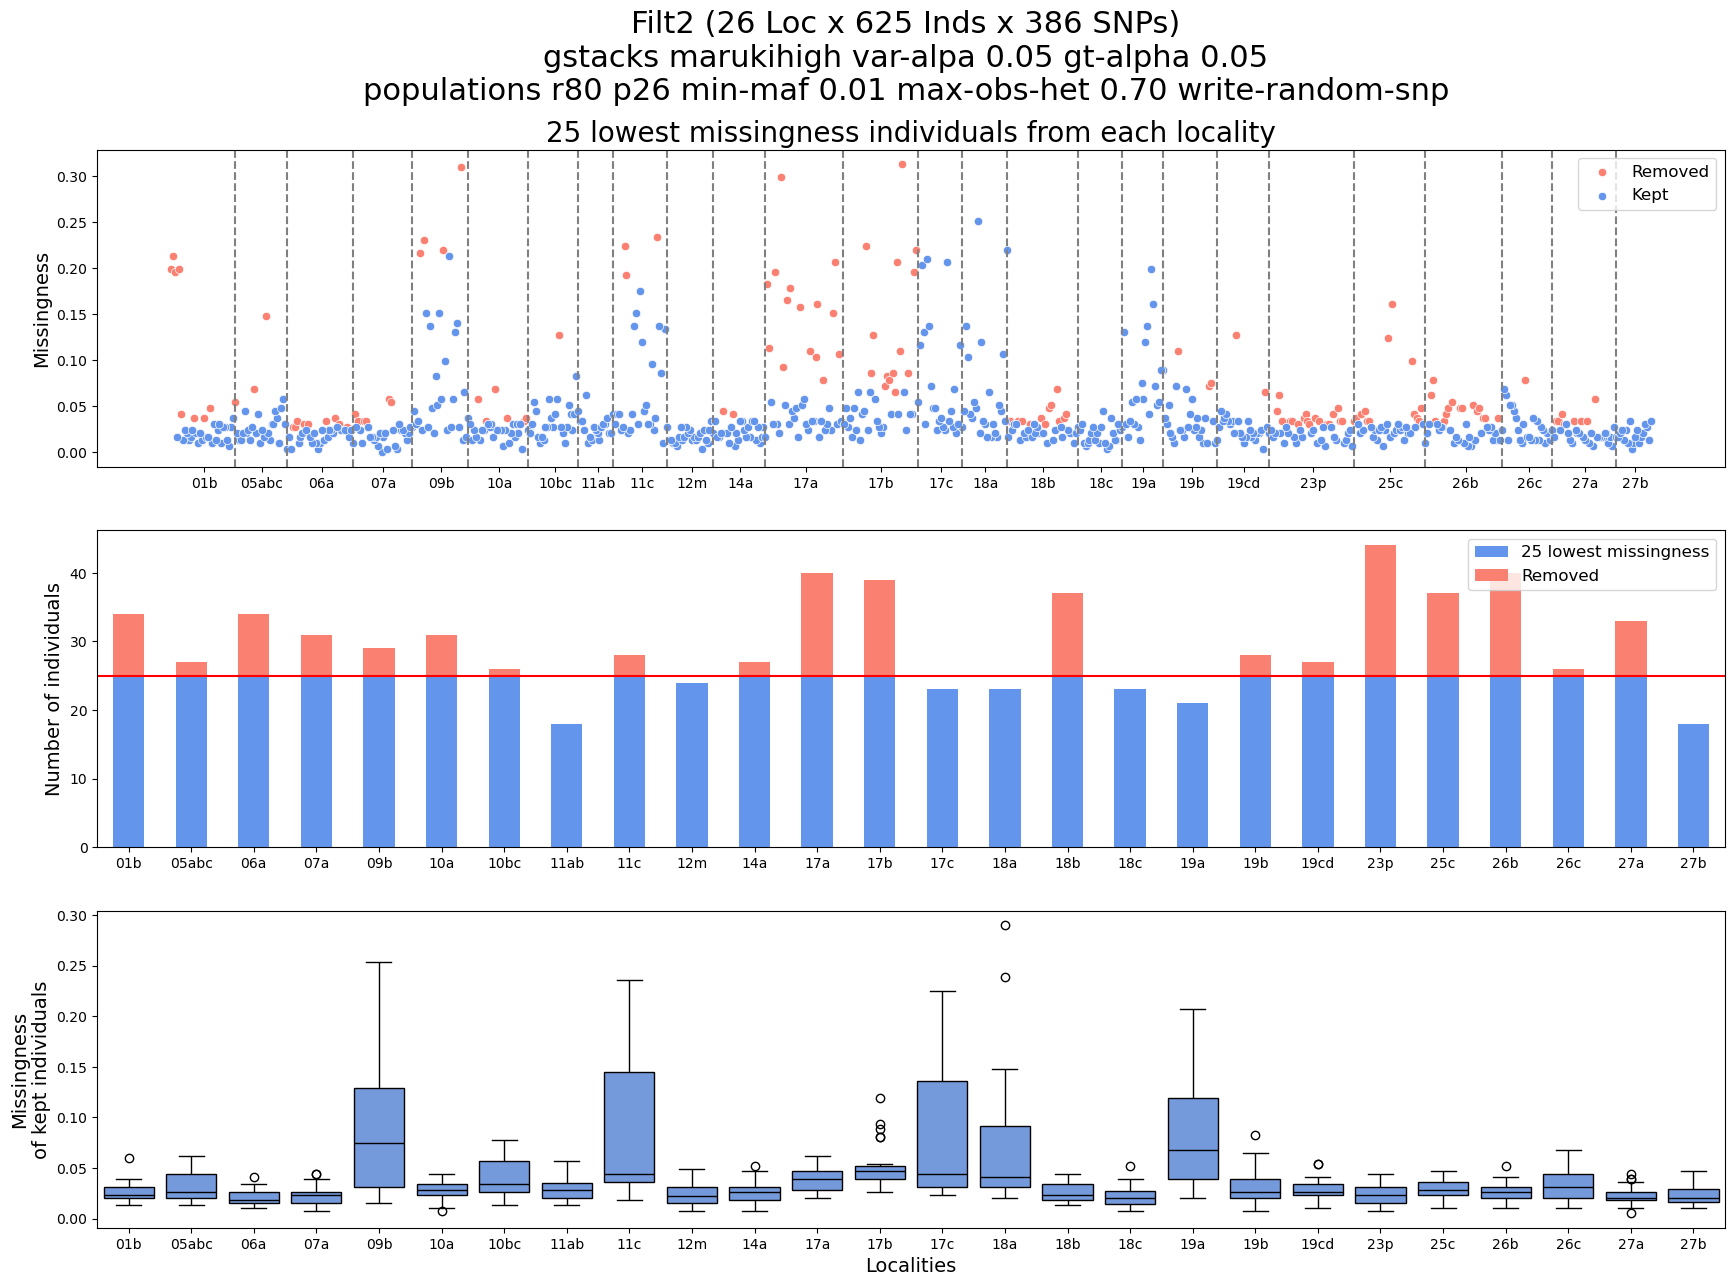

In [10]:
#filt2
#25 best individuals from each locality

df_filt1_imiss=pd.read_csv("filt1.imiss", sep='\t')
df_filt1_imiss=df_filt1_imiss[["INDV","F_MISS"]]
df_filt1_imiss["POP"]="01"
for i in range(0,len(df_filt1_imiss)):
    df_filt1_imiss["POP"][i]=df_filt1_imiss["INDV"][i].split("_")[0]
df_filt2_imiss=pd.DataFrame()
for i in np.unique(df_filt1_imiss["POP"]):
    tmp=df_filt1_imiss[df_filt1_imiss["POP"]==i]
    tmp=tmp.sort_values("F_MISS")
    df_filt2_imiss=pd.concat([df_filt2_imiss,tmp.head(25)])
df_filt2_imiss=df_filt2_imiss.reset_index(drop=True)
df_filt2=df_filt1[df_filt1['sample_prefix'].isin(df_filt2_imiss['INDV'])]

fig,ax=plt.subplots(3,1)
fig.set_size_inches(21,14)
sns.scatterplot(data=df_filt1_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax[0])
sns.scatterplot(data=df_filt2_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax[0])
ax[0].set_title('25 lowest missingness individuals from each locality',size=20)
ax[0].set_xlabel('',size=14)
ax[0].set_ylabel('Missingness',size=14)
ax[0].legend(loc="upper right", fontsize=12)
vline_pos=df_filt1_imiss.tail(1)["INDV"]
xtick_pos=df_filt1_imiss.iloc[[int(len(df_filt1_imiss)/2)]]["INDV"]
for i in np.unique(df_filt1_imiss["POP"]):
    tmp=df_filt1_imiss[df_filt1_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax[0].axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt1_imiss["POP"])
    ax[0].set_xticks(xtick_pos, xtick_lab)

population=[]
starting_individuals=[]
removed_indivduals=[]
kept_individuals=[]
for pop in np.unique(df_filt1["pop"]):
    population.append(pop)
    starting_individuals.append(len(df_filt1[df_filt1["pop"]==pop]))
    kept_inds=len(df_filt2[df_filt2["pop"]==pop])
    if (kept_inds!=0):
        kept_individuals.append(kept_inds)
        removed_indivduals.append(len(df_filt1[df_filt1["pop"]==pop])-kept_inds)
    else:
        kept_individuals.append(0)
        removed_indivduals.append(len(df_filt1[df_filt1["pop"]==pop])) 
d = {'Populations': population, '25 lowest missingness': kept_individuals,
     'Removed': removed_indivduals}
ds = pd.DataFrame(data=d)
ds.plot(x="Populations",kind='bar',stacked=True,color=['cornflowerblue','salmon'],ax=ax[1])
ax[1].set_ylabel('Number of individuals',size=14)
ax[1].set_xlabel('',size=14)
ax[1].tick_params(axis='x', rotation=0)
ax[1].legend(loc="upper right",fontsize=12)
ax[1].axhline(25, color="red")

df_filt2_imiss=pd.read_csv("filt2.imiss", sep='\t')
df_filt2_imiss=df_filt2_imiss[["INDV","F_MISS"]]
df_filt2_imiss["POP"]="01"
for i in range(0,len(df_filt2_imiss)):
    df_filt2_imiss["POP"][i]=df_filt2_imiss["INDV"][i].split("_")[0]

sns.boxplot(data=df_filt2_imiss,x="POP",y="F_MISS", color="cornflowerblue", linecolor="black",
            linewidth=1.0, ax=ax[2])
ax[2].set_xlabel('Localities',size=14)
ax[2].set_ylabel('Missingness\nof kept individuals',size=14)
ax[2].legend().remove()

plt.suptitle("Filt2 (26 Loc x " + str(len(df_filt2)) + " Inds x 386 SNPs)\ngstacks marukihigh var-alpa 0.05 gt-alpha 0.05\n" +
             "populations r80 p26 min-maf 0.01 max-obs-het 0.70 write-random-snp",
             x=0.51, y=0.98, size=22)
pp.savefig(fig)

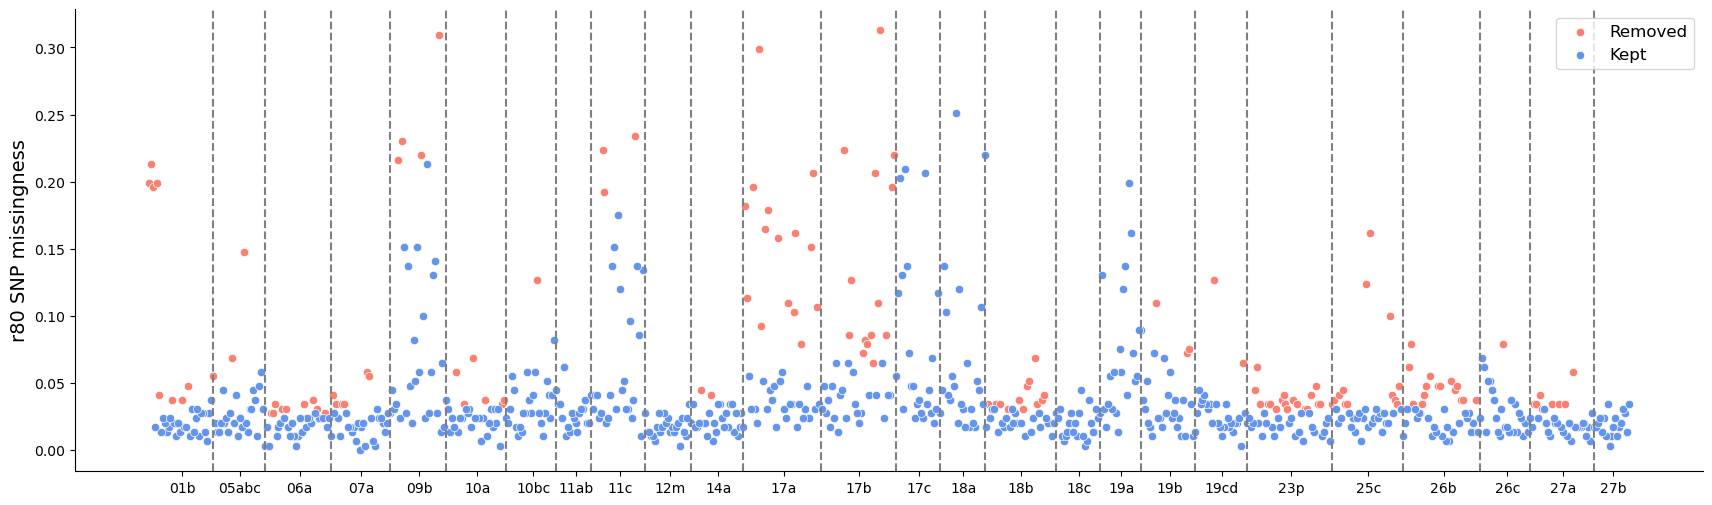

In [11]:
df_filt1_imiss=pd.read_csv("filt1.imiss", sep='\t')
df_filt1_imiss=df_filt1_imiss[["INDV","F_MISS"]]
df_filt1_imiss["POP"]="01"
for i in range(0,len(df_filt1_imiss)):
    df_filt1_imiss["POP"][i]=df_filt1_imiss["INDV"][i].split("_")[0]
df_filt2_imiss=pd.DataFrame()
for i in np.unique(df_filt1_imiss["POP"]):
    tmp=df_filt1_imiss[df_filt1_imiss["POP"]==i]
    tmp=tmp.sort_values("F_MISS")
    df_filt2_imiss=pd.concat([df_filt2_imiss,tmp.head(25)])
df_filt2_imiss=df_filt2_imiss.reset_index(drop=True)
df_filt2=df_filt1[df_filt1['sample_prefix'].isin(df_filt2_imiss['INDV'])]
df_filt2[["sample_prefix","pop"]].to_csv('popmap.filt2.tsv', sep="\t", index=False)

fig,ax=plt.subplots()
fig.set_size_inches(21,6)
sns.scatterplot(data=df_filt1_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax)
sns.scatterplot(data=df_filt2_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax)
ax.set_xlabel('',size=14)
ax.set_ylabel('r80 SNP missingness',size=14)
ax.legend(loc="upper right", fontsize=12)
vline_pos=df_filt1_imiss.tail(1)["INDV"]
xtick_pos=df_filt1_imiss.iloc[[int(len(df_filt1_imiss)/2)]]["INDV"]
for i in np.unique(df_filt1_imiss["POP"]):
    tmp=df_filt1_imiss[df_filt1_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax.axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt1_imiss["POP"])
    ax.set_xticks(xtick_pos, xtick_lab)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pp.savefig(fig)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


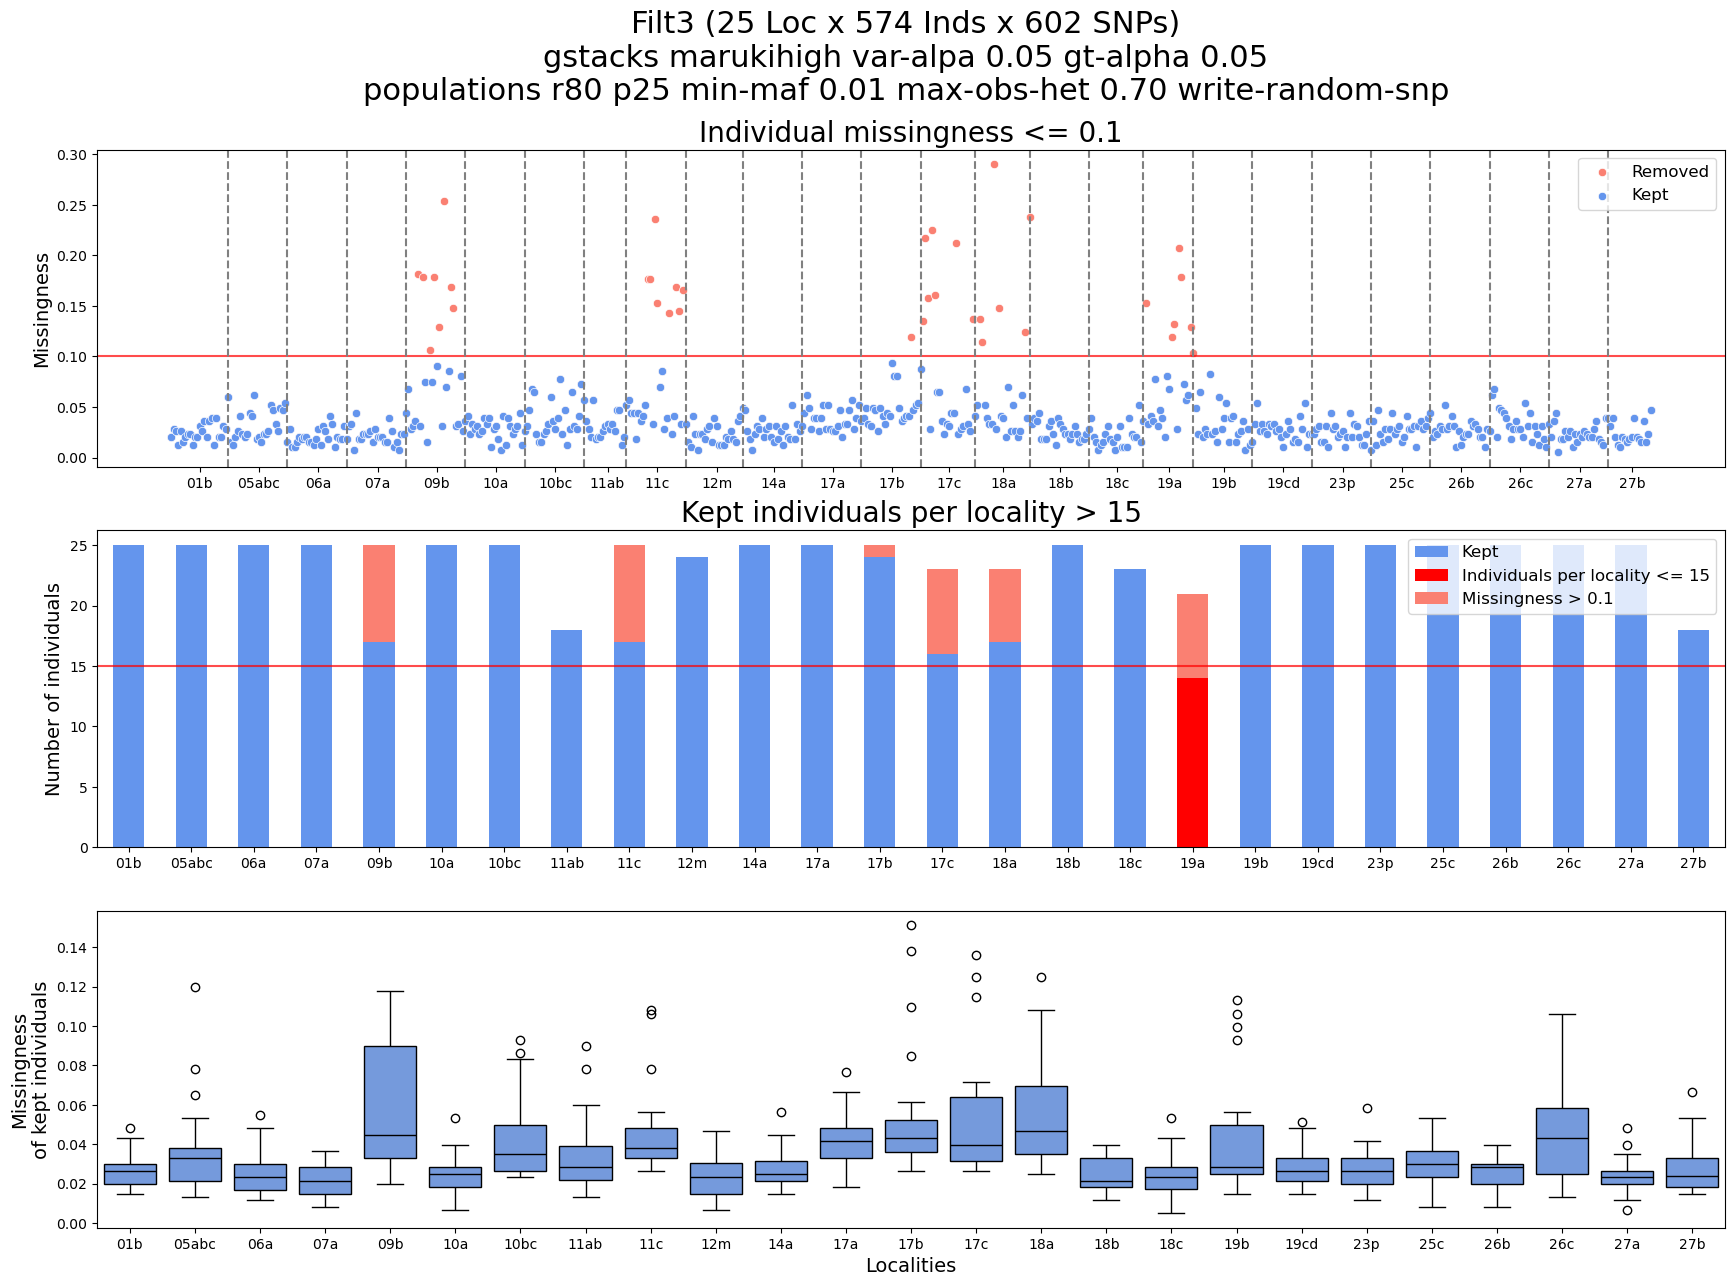

In [12]:
#filt3
#imiss <= 0.10
#individual count per pop >=15

IMISS_THRESH=0.10

df_filt2_imiss=pd.read_csv("filt2.imiss", sep='\t')
df_filt2_imiss=df_filt2_imiss[["INDV","F_MISS"]]
df_filt2_imiss["POP"]="01"
for i in range(0,len(df_filt2_imiss)):
    df_filt2_imiss["POP"][i]=df_filt2_imiss["INDV"][i].split("_")[0]
df_filt3a_imiss=df_filt2_imiss[df_filt2_imiss["F_MISS"]<=IMISS_THRESH]
df_filt3a_imiss=df_filt3a_imiss.reset_index(drop=True)
df_filt3a=df_filt2[df_filt2['sample_prefix'].isin(df_filt3a_imiss['INDV'])]
df_filt3_imiss=df_filt3a_imiss[df_filt3a_imiss["POP"]!="19a"]
df_filt3_imiss=df_filt3_imiss.reset_index(drop=True)
df_filt3=df_filt2[df_filt2['sample_prefix'].isin(df_filt3_imiss['INDV'])]
df_filt3[["sample_prefix","pop"]].to_csv('popmap.filt3.tsv', sep="\t", index=False)

fig,ax=plt.subplots(3,1)
fig.set_size_inches(21,14)
sns.scatterplot(data=df_filt2_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax[0])
sns.scatterplot(data=df_filt3a_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax[0])
ax[0].set_title('Individual missingness <= ' + str(IMISS_THRESH),size=20)
ax[0].set_xlabel('',size=14)
ax[0].set_ylabel('Missingness',size=14)
ax[0].axhline(IMISS_THRESH, color="red", alpha=0.7)
ax[0].legend(loc="upper right", fontsize=12)
vline_pos=df_filt2_imiss.tail(1)["INDV"]
xtick_pos=df_filt2_imiss.iloc[[int(len(df_filt2_imiss)/2)]]["INDV"]
for i in np.unique(df_filt2_imiss["POP"]):
    tmp=df_filt2_imiss[df_filt2_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax[0].axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt2_imiss["POP"])
    ax[0].set_xticks(xtick_pos, xtick_lab)

population=[]
starting_individuals=[]
filt3a_removed=[]
filt3_removed=[]
kept_individuals=[]
for pop in np.unique(df_filt2["pop"]):
    population.append(pop)
    start=len(df_filt2[df_filt2["pop"]==pop])
    starting_individuals.append(start)
    filt3a=len(df_filt3a[df_filt3a["pop"]==pop])
    filt3a_removed.append(start-filt3a)
    filt3=len(df_filt3[df_filt3["pop"]==pop])
    filt3_removed.append(filt3a-filt3)
    kept_individuals.append(filt3)
d = {'Populations': population, 'Kept': kept_individuals, 'Individuals per locality <= 15': filt3_removed, 'Missingness > ' + str(IMISS_THRESH): filt3a_removed}
ds = pd.DataFrame(data=d)
ds.plot(x="Populations",kind='bar',stacked=True,color=['cornflowerblue','red','salmon'],ax=ax[1])
ax[1].set_title('Kept individuals per locality > 15',size=20)
ax[1].set_ylabel('Number of individuals',size=14)
ax[1].set_xlabel('',size=14)
ax[1].tick_params(axis='x', rotation=0)
ax[1].axhline(15, color="red", alpha=0.7)
ax[1].legend(loc="upper right", fontsize=12)

df_filt3_imiss=pd.read_csv("filt3.imiss", sep='\t')
df_filt3_imiss=df_filt3_imiss[["INDV","F_MISS"]]
df_filt3_imiss["POP"]="01"
for i in range(0,len(df_filt3_imiss)):
    df_filt3_imiss["POP"][i]=df_filt3_imiss["INDV"][i].split("_")[0]

sns.boxplot(data=df_filt3_imiss,x="POP",y="F_MISS", color="cornflowerblue", linecolor="black",
            linewidth=1.0, ax=ax[2])
ax[2].set_xlabel('Localities',size=14)
ax[2].set_ylabel('Missingness\nof kept individuals',size=14)
ax[2].legend().remove()

plt.suptitle("Filt3 (25 Loc x " + str(len(df_filt3)) + " Inds x 602 SNPs)\ngstacks marukihigh var-alpa 0.05 gt-alpha 0.05\n" +
             "populations r80 p25 min-maf 0.01 max-obs-het 0.70 write-random-snp",
             x=0.51, y=0.98, size=22)
pp.savefig(fig)

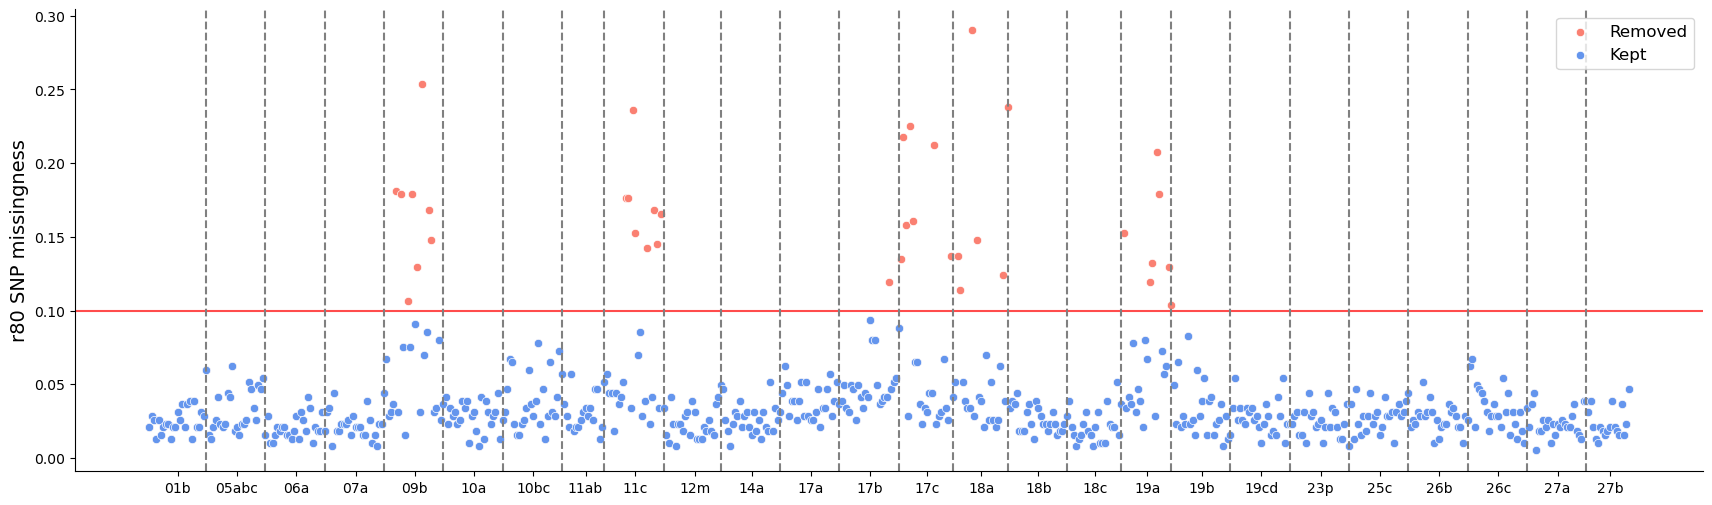

In [13]:
IMISS_THRESH=0.10

df_filt2_imiss=pd.read_csv("filt2.imiss", sep='\t')
df_filt2_imiss=df_filt2_imiss[["INDV","F_MISS"]]
df_filt2_imiss["POP"]="01"
for i in range(0,len(df_filt2_imiss)):
    df_filt2_imiss["POP"][i]=df_filt2_imiss["INDV"][i].split("_")[0]
df_filt3a_imiss=df_filt2_imiss[df_filt2_imiss["F_MISS"]<=IMISS_THRESH]
df_filt3a_imiss=df_filt3a_imiss.reset_index(drop=True)
df_filt3a=df_filt2[df_filt2['sample_prefix'].isin(df_filt3a_imiss['INDV'])]
df_filt3_imiss=df_filt3a_imiss[df_filt3a_imiss["POP"]!="19a"]
df_filt3_imiss=df_filt3_imiss.reset_index(drop=True)
df_filt3=df_filt2[df_filt2['sample_prefix'].isin(df_filt3_imiss['INDV'])]
df_filt3[["sample_prefix","pop"]].to_csv('popmap.filt3.tsv', sep="\t", index=False)

fig,ax=plt.subplots()
fig.set_size_inches(21,6)
sns.scatterplot(data=df_filt2_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax)
sns.scatterplot(data=df_filt3a_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax)
ax.set_xlabel('',size=14)
ax.set_ylabel('r80 SNP missingness',size=14)
ax.axhline(IMISS_THRESH, color="red", alpha=0.7)
ax.legend(loc="upper right", fontsize=12)
vline_pos=df_filt2_imiss.tail(1)["INDV"]
xtick_pos=df_filt2_imiss.iloc[[int(len(df_filt2_imiss)/2)]]["INDV"]
for i in np.unique(df_filt2_imiss["POP"]):
    tmp=df_filt2_imiss[df_filt2_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax.axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt2_imiss["POP"])
    ax.set_xticks(xtick_pos, xtick_lab)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

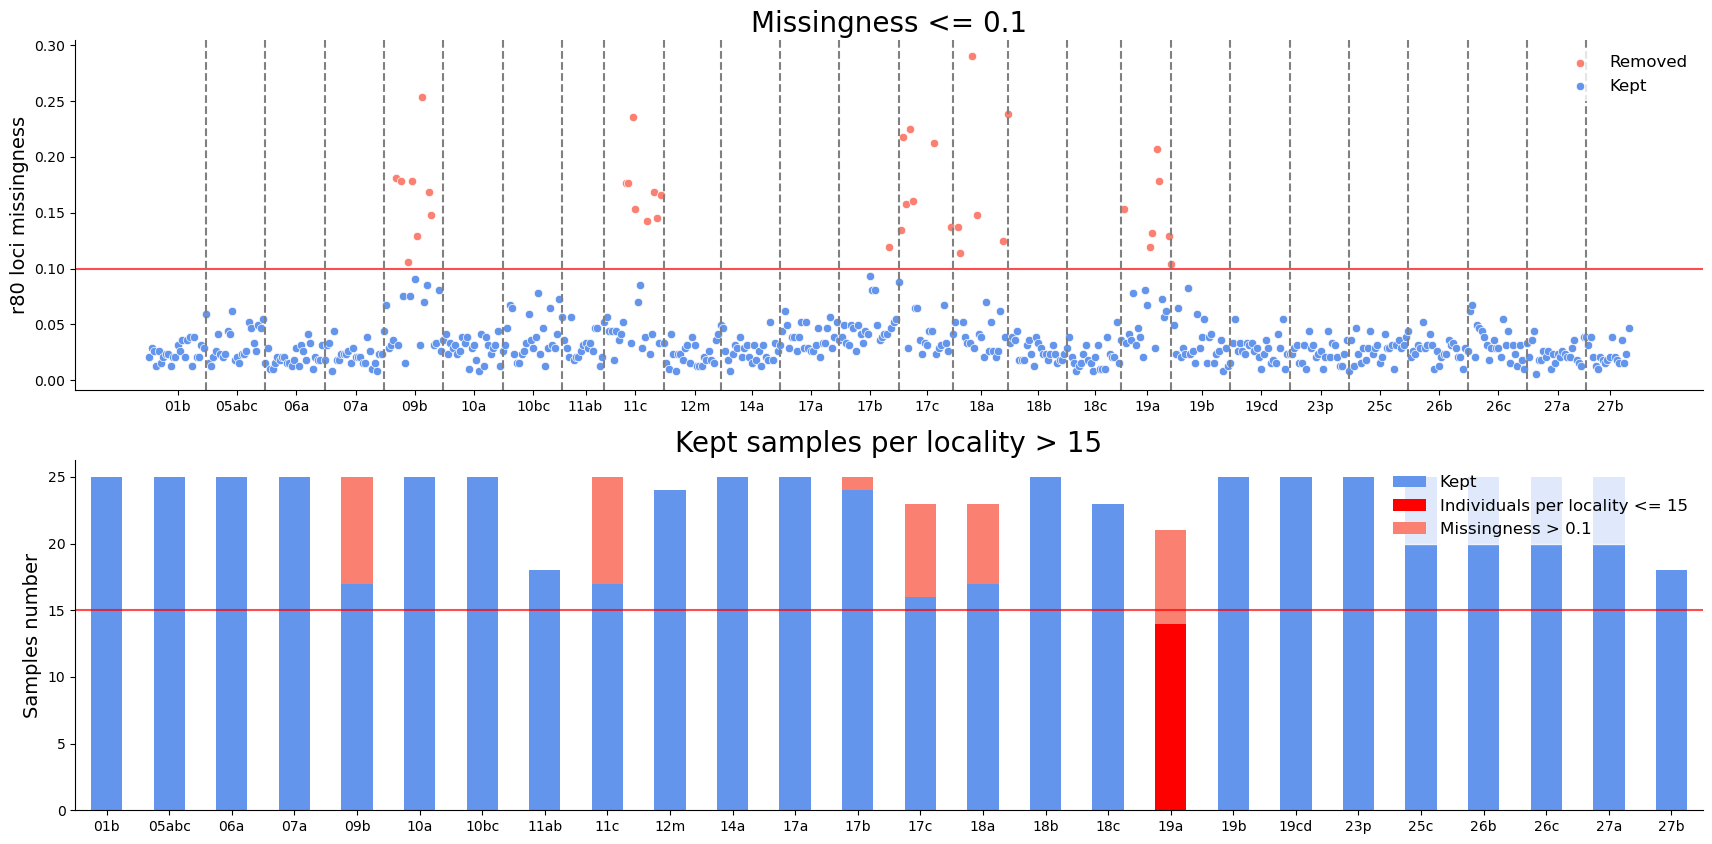

In [14]:
#filt3
#imiss <= 0.10
#individual count per pop >=15

IMISS_THRESH=0.10

df_filt2_imiss=pd.read_csv("filt2.imiss", sep='\t')
df_filt2_imiss=df_filt2_imiss[["INDV","F_MISS"]]
df_filt2_imiss["POP"]="01"
for i in range(0,len(df_filt2_imiss)):
    df_filt2_imiss["POP"][i]=df_filt2_imiss["INDV"][i].split("_")[0]
df_filt3a_imiss=df_filt2_imiss[df_filt2_imiss["F_MISS"]<=IMISS_THRESH]
df_filt3a_imiss=df_filt3a_imiss.reset_index(drop=True)
df_filt3a=df_filt2[df_filt2['sample_prefix'].isin(df_filt3a_imiss['INDV'])]
df_filt3_imiss=df_filt3a_imiss[df_filt3a_imiss["POP"]!="19a"]
df_filt3_imiss=df_filt3_imiss.reset_index(drop=True)
df_filt3=df_filt2[df_filt2['sample_prefix'].isin(df_filt3_imiss['INDV'])]
df_filt3[["sample_prefix","pop"]].to_csv('popmap.filt3.tsv', sep="\t", index=False)

fig,ax=plt.subplots(2,1)
fig.set_size_inches(21,10)
sns.scatterplot(data=df_filt2_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax[0])
sns.scatterplot(data=df_filt3a_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax[0])
ax[0].set_title('Missingness <= ' + str(IMISS_THRESH),size=20)
ax[0].set_xlabel('',size=14)
ax[0].set_ylabel('r80 loci missingness',size=14)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].axhline(IMISS_THRESH, color="red", alpha=0.7)
ax[0].legend(loc="upper right", fontsize=12, edgecolor="white")
vline_pos=df_filt2_imiss.tail(1)["INDV"]
xtick_pos=df_filt2_imiss.iloc[[int(len(df_filt2_imiss)/2)]]["INDV"]
for i in np.unique(df_filt2_imiss["POP"]):
    tmp=df_filt2_imiss[df_filt2_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax[0].axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt2_imiss["POP"])
    ax[0].set_xticks(xtick_pos, xtick_lab)

population=[]
starting_individuals=[]
filt3a_removed=[]
filt3_removed=[]
kept_individuals=[]
for pop in np.unique(df_filt2["pop"]):
    population.append(pop)
    start=len(df_filt2[df_filt2["pop"]==pop])
    starting_individuals.append(start)
    filt3a=len(df_filt3a[df_filt3a["pop"]==pop])
    filt3a_removed.append(start-filt3a)
    filt3=len(df_filt3[df_filt3["pop"]==pop])
    filt3_removed.append(filt3a-filt3)
    kept_individuals.append(filt3)
d = {'Populations': population, 'Kept': kept_individuals, 'Individuals per locality <= 15': filt3_removed, 'Missingness > ' + str(IMISS_THRESH): filt3a_removed}
ds = pd.DataFrame(data=d)
ds.plot(x="Populations",kind='bar',stacked=True,color=['cornflowerblue','red','salmon'],ax=ax[1])
ax[1].set_title('Kept samples per locality > 15',size=20)
ax[1].set_ylabel('Samples number',size=14)
ax[1].set_xlabel('',size=14)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(axis='x', rotation=0)
ax[1].axhline(15, color="red", alpha=0.7)
ax[1].legend(loc="upper right", fontsize=12, edgecolor="white")

pp.savefig(fig)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


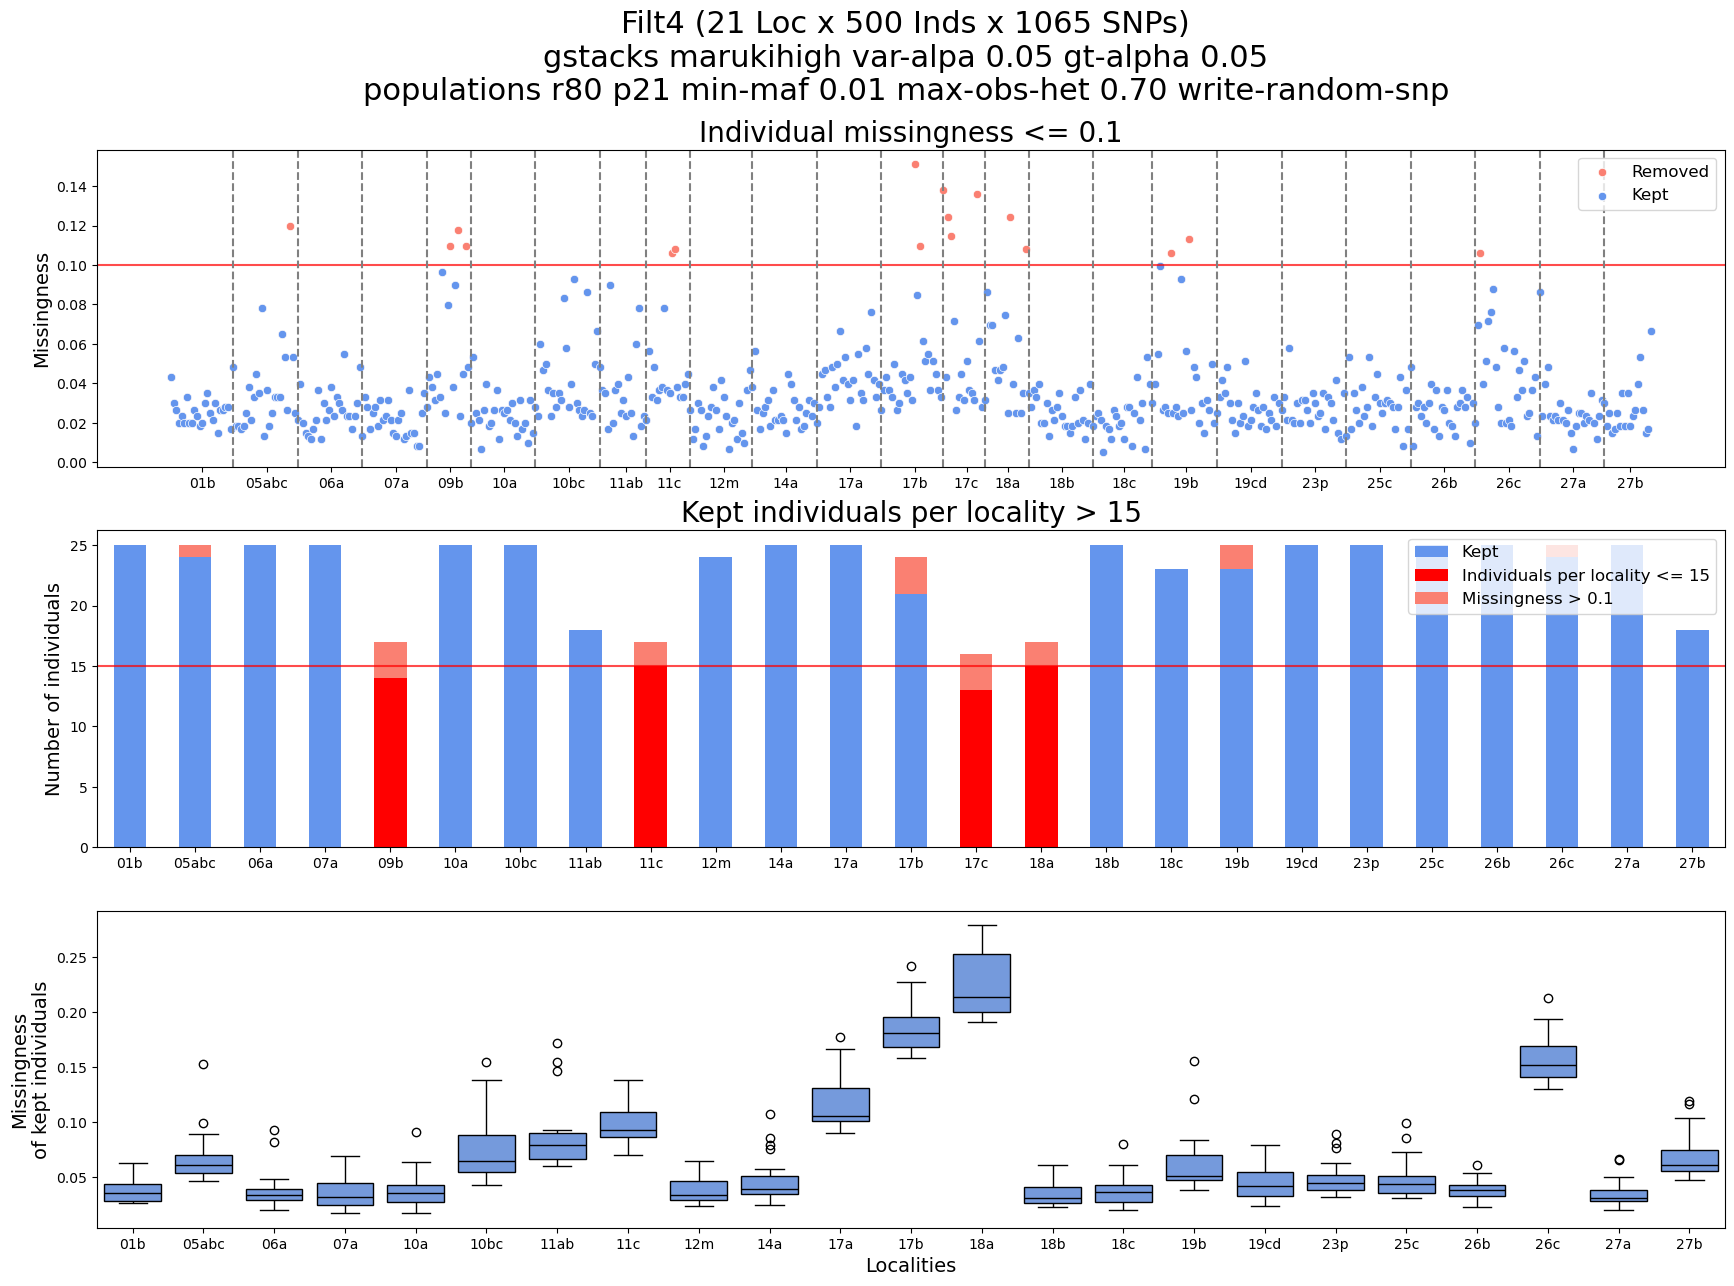

In [15]:
#filt4
#imiss <= 0.10
#individual count per pop >=15

IMISS_THRESH=0.10

df_filt3_imiss=pd.read_csv("filt3.imiss", sep='\t')
df_filt3_imiss=df_filt3_imiss[["INDV","F_MISS"]]
df_filt3_imiss["POP"]="01"
for i in range(0,len(df_filt3_imiss)):
    df_filt3_imiss["POP"][i]=df_filt3_imiss["INDV"][i].split("_")[0]
df_filt4a_imiss=df_filt3_imiss[df_filt3_imiss["F_MISS"]<=IMISS_THRESH]
df_filt4a_imiss=df_filt4a_imiss.reset_index(drop=True)
df_filt4a=df_filt3[df_filt3['sample_prefix'].isin(df_filt4a_imiss['INDV'])]
df_filt4_imiss=df_filt4a_imiss[df_filt4a_imiss["POP"]!="09b"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="11c"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="17c"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="18a"]
df_filt4_imiss=df_filt4_imiss.reset_index(drop=True)
df_filt4=df_filt3[df_filt3['sample_prefix'].isin(df_filt4_imiss['INDV'])]
df_filt4[["sample_prefix","pop"]].to_csv('popmap.filt4.tsv', sep="\t", index=False)

fig,ax=plt.subplots(3,1)
fig.set_size_inches(21,14)
sns.scatterplot(data=df_filt3_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax[0])
sns.scatterplot(data=df_filt4a_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax[0])
ax[0].set_title('Individual missingness <= ' + str(IMISS_THRESH),size=20)
ax[0].set_xlabel('',size=14)
ax[0].set_ylabel('Missingness',size=14)
ax[0].axhline(IMISS_THRESH, color="red", alpha=0.7)
ax[0].legend(loc="upper right", fontsize=12)
vline_pos=df_filt3_imiss.tail(1)["INDV"]
xtick_pos=df_filt3_imiss.iloc[[int(len(df_filt3_imiss)/2)]]["INDV"]
for i in np.unique(df_filt3_imiss["POP"]):
    tmp=df_filt3_imiss[df_filt3_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax[0].axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt3_imiss["POP"])
    ax[0].set_xticks(xtick_pos, xtick_lab)

population=[]
starting_individuals=[]
filt4a_removed=[]
filt4_removed=[]
kept_individuals=[]
for pop in np.unique(df_filt3["pop"]):
    population.append(pop)
    start=len(df_filt3[df_filt3["pop"]==pop])
    starting_individuals.append(start)
    filt4a=len(df_filt4a[df_filt4a["pop"]==pop])
    filt4a_removed.append(start-filt4a)
    filt4=len(df_filt4[df_filt4["pop"]==pop])
    filt4_removed.append(filt4a-filt4)
    kept_individuals.append(filt4)
d = {'Populations': population, 'Kept': kept_individuals, 'Individuals per locality <= 15': filt4_removed, 'Missingness > ' + str(IMISS_THRESH): filt4a_removed}
ds = pd.DataFrame(data=d)
ds.plot(x="Populations",kind='bar',stacked=True,color=['cornflowerblue','red','salmon'],ax=ax[1])
ax[1].set_title('Kept individuals per locality > 15',size=20)
ax[1].set_ylabel('Number of individuals',size=14)
ax[1].set_xlabel('',size=14)
ax[1].tick_params(axis='x', rotation=0)
ax[1].axhline(15, color="red", alpha=0.7)
ax[1].legend(loc="upper right", fontsize=12)

df_filt4_imiss=pd.read_csv("filt4.imiss", sep='\t')
df_filt4_imiss=df_filt4_imiss[["INDV","F_MISS"]]
df_filt4_imiss["POP"]="01"
for i in range(0,len(df_filt4_imiss)):
    df_filt4_imiss["POP"][i]=df_filt4_imiss["INDV"][i].split("_")[0]

sns.boxplot(data=df_filt4_imiss,x="POP",y="F_MISS", color="cornflowerblue", linecolor="black",
            linewidth=1.0, ax=ax[2])
ax[2].set_xlabel('Localities',size=14)
ax[2].set_ylabel('Missingness\nof kept individuals',size=14)
ax[2].legend().remove()

plt.suptitle("Filt4 (21 Loc x " + str(len(df_filt4)) + " Inds x 1065 SNPs)\ngstacks marukihigh var-alpa 0.05 gt-alpha 0.05\n" +
             "populations r80 p21 min-maf 0.01 max-obs-het 0.70 write-random-snp",
             x=0.51, y=0.98, size=22)
pp.savefig(fig)

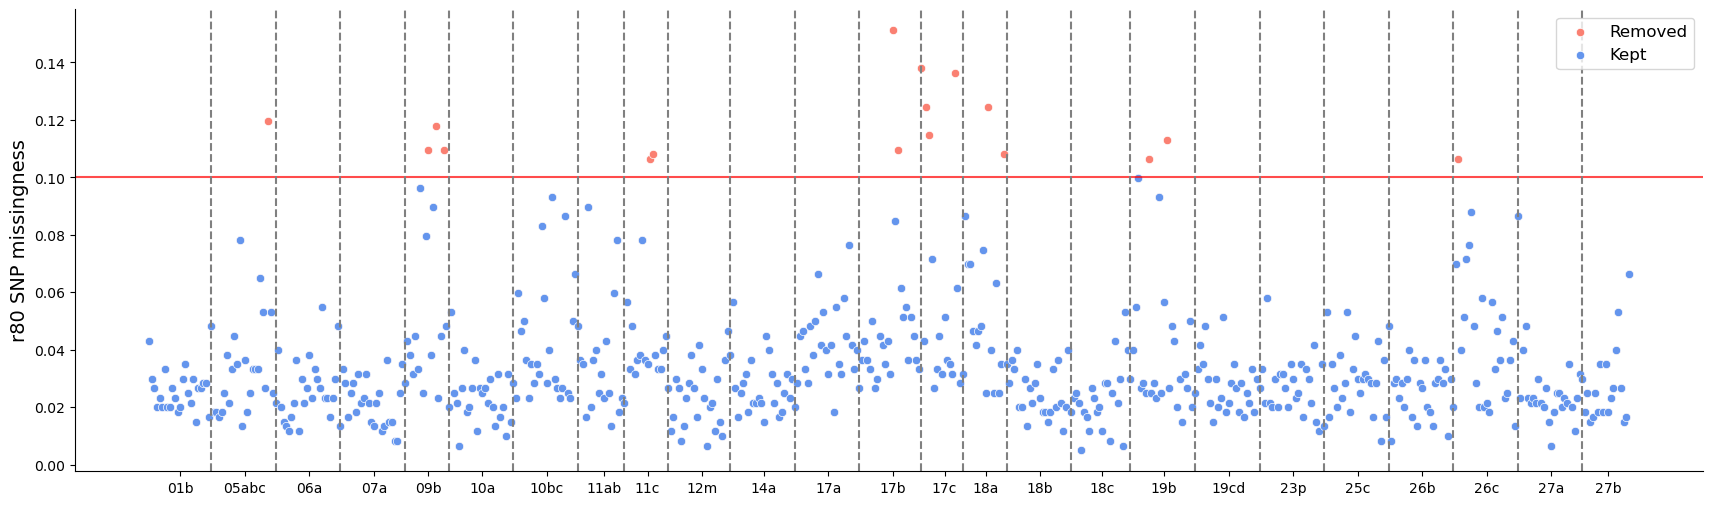

In [16]:
IMISS_THRESH=0.10

df_filt3_imiss=pd.read_csv("filt3.imiss", sep='\t')
df_filt3_imiss=df_filt3_imiss[["INDV","F_MISS"]]
df_filt3_imiss["POP"]="01"
for i in range(0,len(df_filt3_imiss)):
    df_filt3_imiss["POP"][i]=df_filt3_imiss["INDV"][i].split("_")[0]
df_filt4a_imiss=df_filt3_imiss[df_filt3_imiss["F_MISS"]<=IMISS_THRESH]
df_filt4a_imiss=df_filt4a_imiss.reset_index(drop=True)
df_filt4a=df_filt3[df_filt3['sample_prefix'].isin(df_filt4a_imiss['INDV'])]
df_filt4_imiss=df_filt4a_imiss[df_filt4a_imiss["POP"]!="09b"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="11c"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="17c"]
df_filt4_imiss=df_filt4_imiss[df_filt4_imiss["POP"]!="18a"]
df_filt4_imiss=df_filt4_imiss.reset_index(drop=True)
df_filt4=df_filt3[df_filt3['sample_prefix'].isin(df_filt4_imiss['INDV'])]
df_filt4[["sample_prefix","pop"]].to_csv('popmap.filt4.tsv', sep="\t", index=False)

fig,ax=plt.subplots()
fig.set_size_inches(21,6)
sns.scatterplot(data=df_filt3_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax)
sns.scatterplot(data=df_filt4a_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax)
ax.set_xlabel('',size=14)
ax.set_ylabel('r80 SNP missingness',size=14)
ax.axhline(IMISS_THRESH, color="red", alpha=0.7)
ax.legend(loc="upper right", fontsize=12)
vline_pos=df_filt3_imiss.tail(1)["INDV"]
xtick_pos=df_filt3_imiss.iloc[[int(len(df_filt3_imiss)/2)]]["INDV"]
for i in np.unique(df_filt3_imiss["POP"]):
    tmp=df_filt3_imiss[df_filt3_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax.axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt3_imiss["POP"])
    ax.set_xticks(xtick_pos, xtick_lab)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


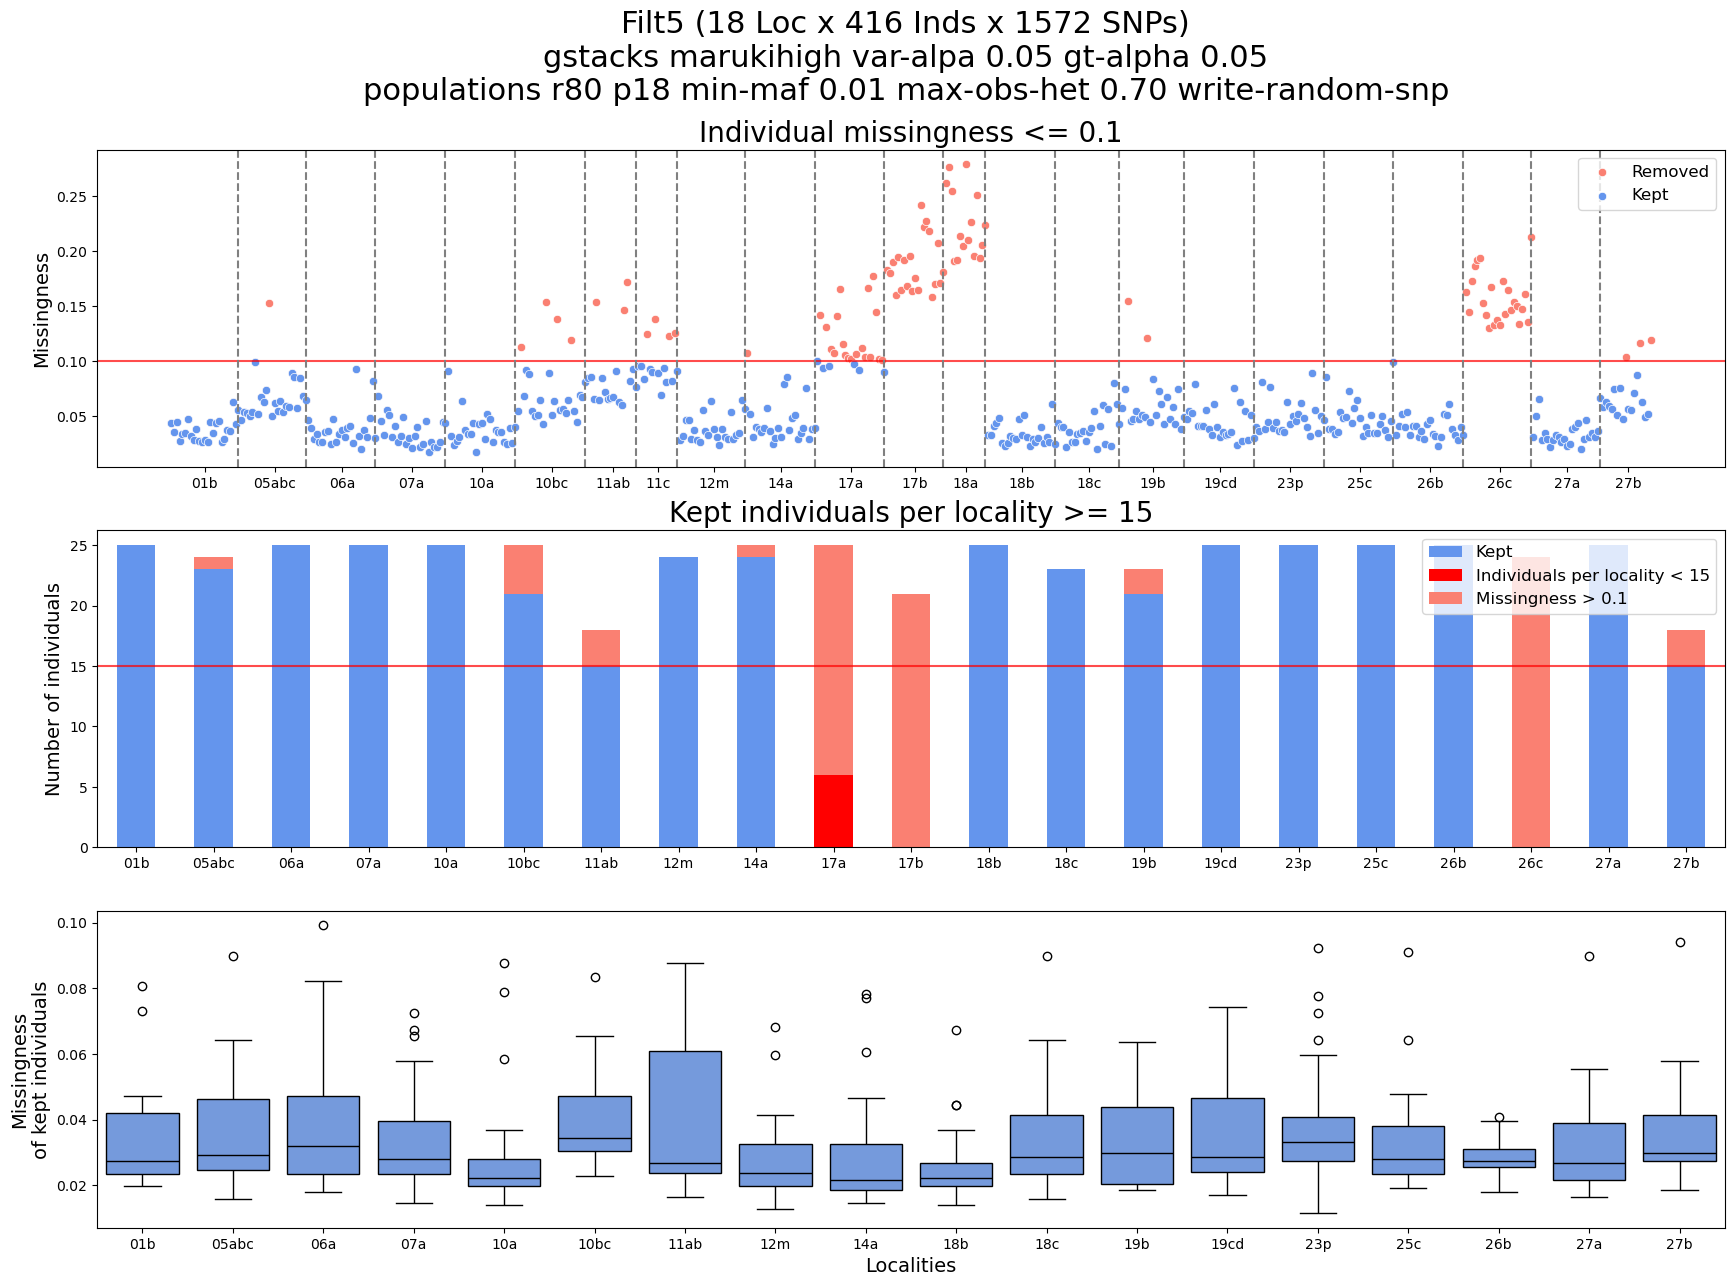

In [17]:
#filt5
#imiss <= 0.10
#individual count per pop >=15

IMISS_THRESH=0.10

df_filt4_imiss=pd.read_csv("filt4.imiss", sep='\t')
df_filt4_imiss=df_filt4_imiss[["INDV","F_MISS"]]
df_filt4_imiss["POP"]="01"
for i in range(0,len(df_filt4_imiss)):
    df_filt4_imiss["POP"][i]=df_filt4_imiss["INDV"][i].split("_")[0]
df_filt5a_imiss=df_filt4_imiss[df_filt4_imiss["F_MISS"]<=IMISS_THRESH]
df_filt5a_imiss=df_filt5a_imiss.reset_index(drop=True)
df_filt5a=df_filt4[df_filt4['sample_prefix'].isin(df_filt5a_imiss['INDV'])]
df_filt5_imiss=df_filt5a_imiss[df_filt5a_imiss["POP"]!="17a"]
df_filt5_imiss=df_filt5_imiss[df_filt5_imiss["POP"]!="17b"]
df_filt5_imiss=df_filt5_imiss[df_filt5_imiss["POP"]!="26c"]
df_filt5_imiss=df_filt5_imiss.reset_index(drop=True)
df_filt5=df_filt4[df_filt4['sample_prefix'].isin(df_filt5_imiss['INDV'])]
df_filt5[["sample_prefix","pop"]].to_csv('popmap.filt5.tsv', sep="\t", index=False)

fig,ax=plt.subplots(3,1)
fig.set_size_inches(21,14)
sns.scatterplot(data=df_filt4_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax[0])
sns.scatterplot(data=df_filt5a_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax[0])
ax[0].set_title('Individual missingness <= ' + str(IMISS_THRESH),size=20)
ax[0].set_xlabel('',size=14)
ax[0].set_ylabel('Missingness',size=14)
ax[0].axhline(IMISS_THRESH, color="red", alpha=0.7)
ax[0].legend(loc="upper right", fontsize=12)
vline_pos=df_filt4_imiss.tail(1)["INDV"]
xtick_pos=df_filt4_imiss.iloc[[int(len(df_filt4_imiss)/2)]]["INDV"]
for i in np.unique(df_filt4_imiss["POP"]):
    tmp=df_filt4_imiss[df_filt4_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax[0].axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt4_imiss["POP"])
    ax[0].set_xticks(xtick_pos, xtick_lab)

population=[]
starting_individuals=[]
filt5a_removed=[]
filt5_removed=[]
kept_individuals=[]
for pop in np.unique(df_filt4["pop"]):
    population.append(pop)
    start=len(df_filt4[df_filt4["pop"]==pop])
    starting_individuals.append(start)
    filt5a=len(df_filt5a[df_filt5a["pop"]==pop])
    filt5a_removed.append(start-filt5a)
    filt5=len(df_filt5[df_filt5["pop"]==pop])
    filt5_removed.append(filt5a-filt5)
    kept_individuals.append(filt5)
d = {'Populations': population, 'Kept': kept_individuals, 'Individuals per locality < 15': filt5_removed, 'Missingness > ' + str(IMISS_THRESH): filt5a_removed}
ds = pd.DataFrame(data=d)
ds.plot(x="Populations",kind='bar',stacked=True,color=['cornflowerblue','red','salmon'],ax=ax[1])
ax[1].set_title('Kept individuals per locality >= 15',size=20)
ax[1].set_ylabel('Number of individuals',size=14)
ax[1].set_xlabel('',size=14)
ax[1].tick_params(axis='x', rotation=0)
ax[1].axhline(15, color="red", alpha=0.7)
ax[1].legend(loc="upper right", fontsize=12)

df_filt5_imiss=pd.read_csv("filt5.imiss", sep='\t')
df_filt5_imiss=df_filt5_imiss[["INDV","F_MISS"]]
df_filt5_imiss["POP"]="01"
for i in range(0,len(df_filt5_imiss)):
    df_filt5_imiss["POP"][i]=df_filt5_imiss["INDV"][i].split("_")[0]

sns.boxplot(data=df_filt5_imiss,x="POP",y="F_MISS", color="cornflowerblue", linecolor="black",
            linewidth=1.0, ax=ax[2])
ax[2].set_xlabel('Localities',size=14)
ax[2].set_ylabel('Missingness\nof kept individuals',size=14)
ax[2].legend().remove()

plt.suptitle("Filt5 (18 Loc x " + str(len(df_filt5)) + " Inds x 1572 SNPs)\ngstacks marukihigh var-alpa 0.05 gt-alpha 0.05\n" +
             "populations r80 p18 min-maf 0.01 max-obs-het 0.70 write-random-snp",
             x=0.51, y=0.98, size=22)
pp.savefig(fig)

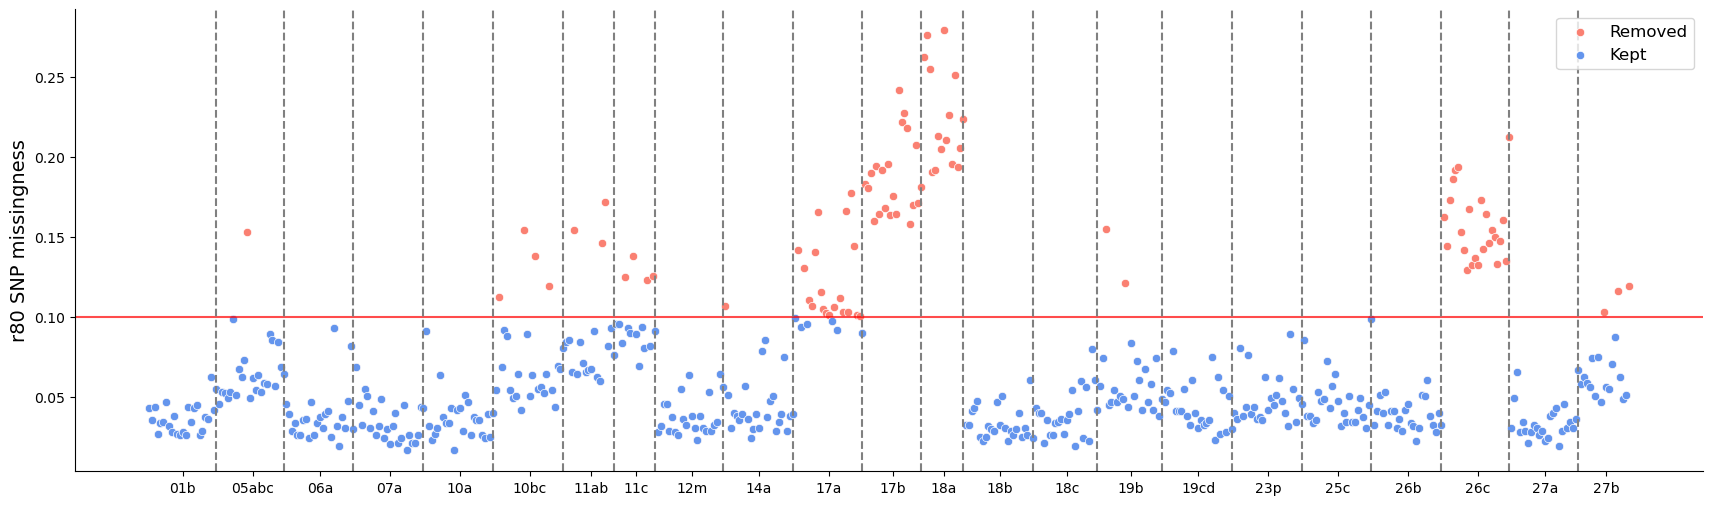

In [18]:
IMISS_THRESH=0.10

df_filt4_imiss=pd.read_csv("filt4.imiss", sep='\t')
df_filt4_imiss=df_filt4_imiss[["INDV","F_MISS"]]
df_filt4_imiss["POP"]="01"
for i in range(0,len(df_filt4_imiss)):
    df_filt4_imiss["POP"][i]=df_filt4_imiss["INDV"][i].split("_")[0]
df_filt5a_imiss=df_filt4_imiss[df_filt4_imiss["F_MISS"]<=IMISS_THRESH]
df_filt5a_imiss=df_filt5a_imiss.reset_index(drop=True)
df_filt5a=df_filt4[df_filt4['sample_prefix'].isin(df_filt5a_imiss['INDV'])]
df_filt5_imiss=df_filt5a_imiss[df_filt5a_imiss["POP"]!="17a"]
df_filt5_imiss=df_filt5_imiss[df_filt5_imiss["POP"]!="17b"]
df_filt5_imiss=df_filt5_imiss[df_filt5_imiss["POP"]!="26c"]
df_filt5_imiss=df_filt5_imiss.reset_index(drop=True)
df_filt5=df_filt4[df_filt4['sample_prefix'].isin(df_filt5_imiss['INDV'])]
df_filt5[["sample_prefix","pop"]].to_csv('popmap.filt5.tsv', sep="\t", index=False)

fig,ax=plt.subplots()
fig.set_size_inches(21,6)
sns.scatterplot(data=df_filt4_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax)
sns.scatterplot(data=df_filt5a_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax)
ax.set_xlabel('',size=14)
ax.set_ylabel('r80 SNP missingness',size=14)
ax.axhline(IMISS_THRESH, color="red", alpha=0.7)
ax.legend(loc="upper right", fontsize=12)
vline_pos=df_filt4_imiss.tail(1)["INDV"]
xtick_pos=df_filt4_imiss.iloc[[int(len(df_filt4_imiss)/2)]]["INDV"]
for i in np.unique(df_filt4_imiss["POP"]):
    tmp=df_filt4_imiss[df_filt4_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax.axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt4_imiss["POP"])
    ax.set_xticks(xtick_pos, xtick_lab)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


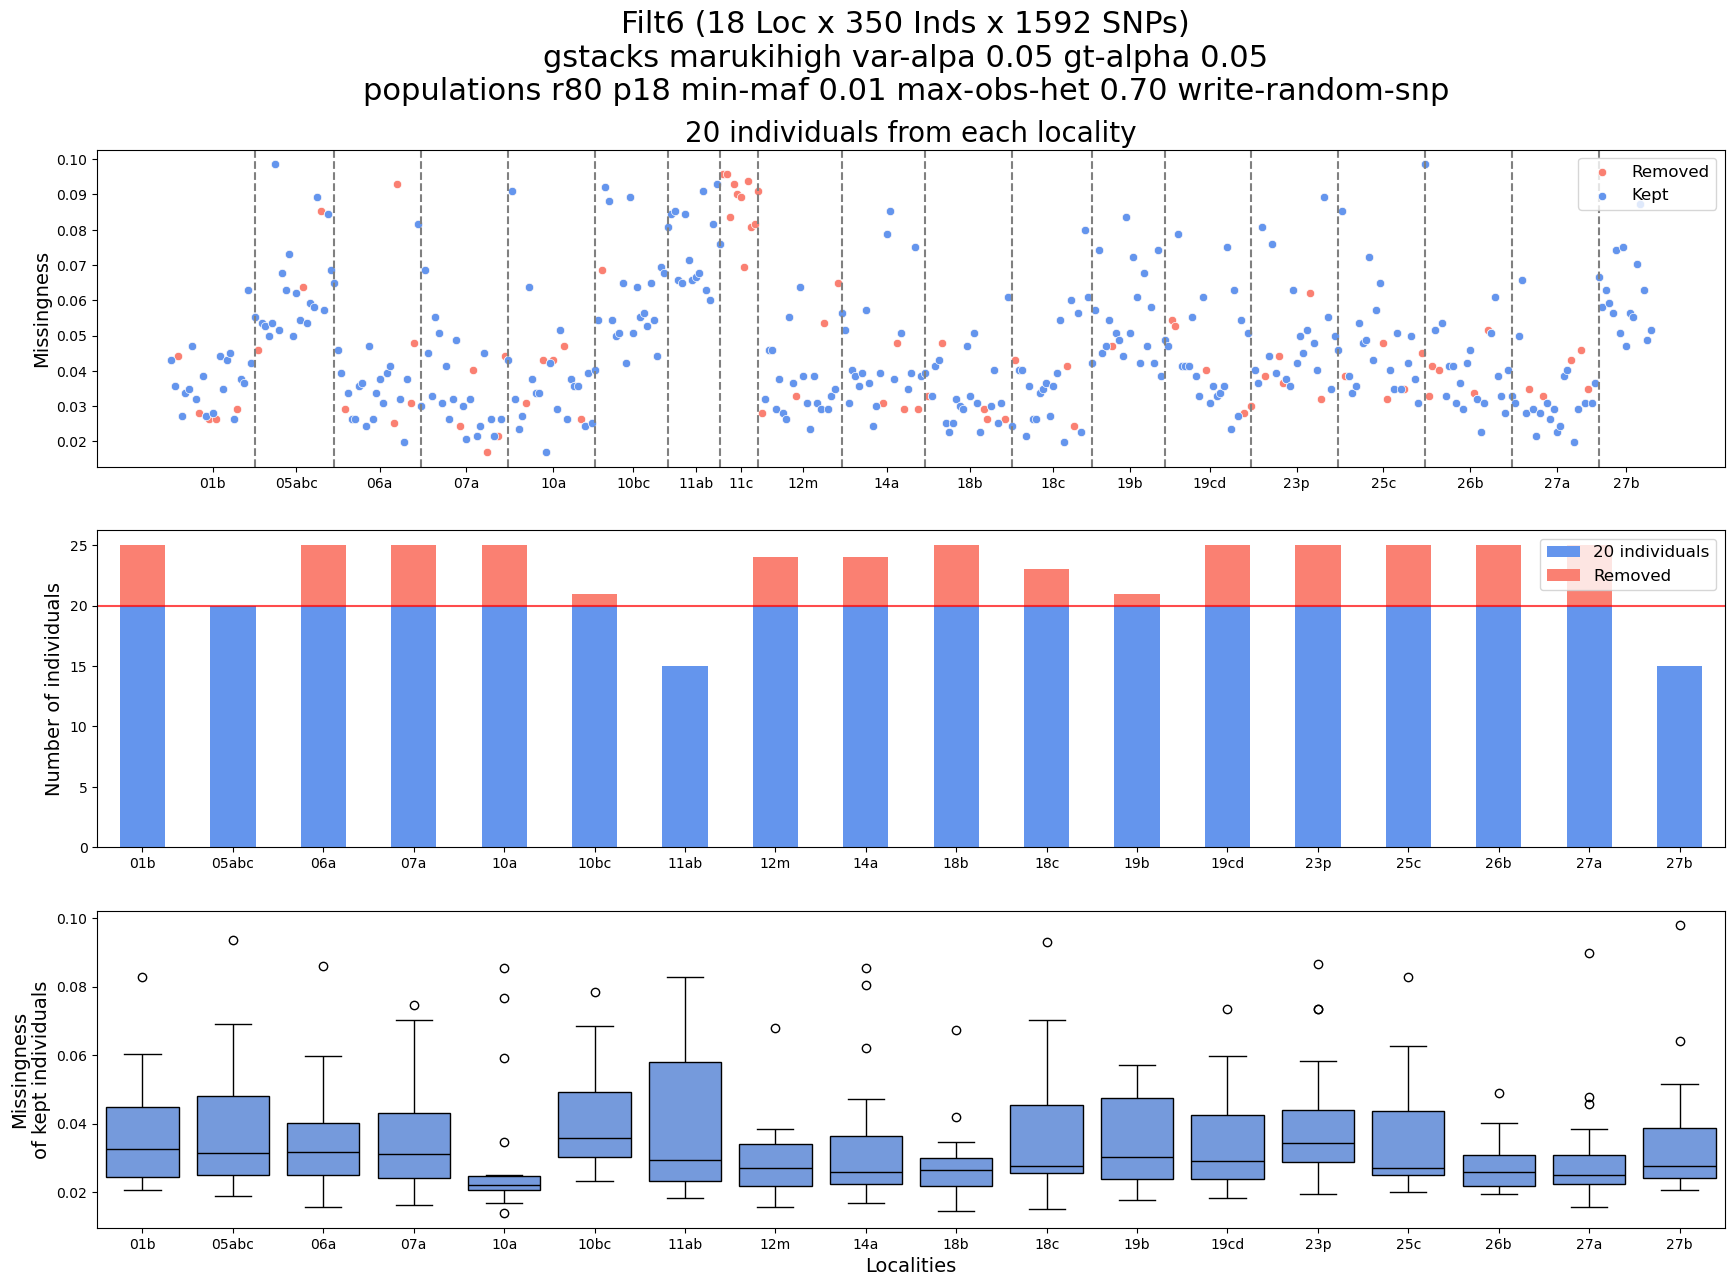

In [19]:
#filt6
#20 individuals per locality

#df_filt6_imiss=pd.DataFrame()
#for i in np.unique(df_filt5_imiss["POP"]):
#    tmp=df_filt5_imiss[df_filt5_imiss["POP"]==i]
#    if len(tmp)>=20:
#        tmp=tmp.sample(20)
#    df_filt6_imiss=pd.concat([df_filt6_imiss,tmp])
#df_filt6_imiss=df_filt6_imiss.reset_index(drop=True)
#df_filt6_imiss=df_filt6_imiss.sort_values("INDV")

popmap_filt6=pd.read_csv("popmap.filt6.tsv", sep='\t')
df_filt6_imiss=df_filt5_imiss[df_filt5_imiss['INDV'].isin(popmap_filt6['sample_prefix'])]

df_filt6=df_filt5[df_filt5['sample_prefix'].isin(df_filt6_imiss['INDV'])]
df_filt6[["sample_prefix","pop"]].to_csv('popmap.filt6.tsv', sep="\t", index=False)
df_filt6[["sample_prefix","LIBRARY"]].to_csv('libmap.filt6.tsv', sep="\t", index=False)

fig,ax=plt.subplots(3,1)
fig.set_size_inches(21,14)
sns.scatterplot(data=df_filt5_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax[0])
sns.scatterplot(data=df_filt6_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax[0])
ax[0].set_title('20 individuals from each locality',size=20)
ax[0].set_xlabel('',size=14)
ax[0].set_ylabel('Missingness',size=14)
ax[0].legend(loc="upper right", fontsize=12)
vline_pos=df_filt5_imiss.tail(1)["INDV"]
xtick_pos=df_filt5_imiss.iloc[[int(len(df_filt5_imiss)/2)]]["INDV"]
for i in np.unique(df_filt5_imiss["POP"]):
    tmp=df_filt5_imiss[df_filt5_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax[0].axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt5_imiss["POP"])
    ax[0].set_xticks(xtick_pos, xtick_lab)

population=[]
starting_individuals=[]
removed_indivduals=[]
kept_individuals=[]
for pop in np.unique(df_filt5["pop"]):
    population.append(pop)
    starting_individuals.append(len(df_filt5[df_filt5["pop"]==pop]))
    kept_inds=len(df_filt6[df_filt6["pop"]==pop])
    if (kept_inds!=0):
        kept_individuals.append(kept_inds)
        removed_indivduals.append(len(df_filt5[df_filt5["pop"]==pop])-kept_inds)
    else:
        kept_individuals.append(0)
        removed_indivduals.append(len(df_filt5[df_filt5["pop"]==pop])) 
removed_indivduals[1]=0
d = {'Populations': population, '20 individuals': kept_individuals, 'Removed': removed_indivduals}
ds = pd.DataFrame(data=d)
ds.plot(x="Populations",kind='bar',stacked=True,color=['cornflowerblue','salmon'],ax=ax[1])
ax[1].set_title('',size=20)
ax[1].set_ylabel('Number of individuals',size=14)
ax[1].set_xlabel('',size=14)
ax[1].tick_params(axis='x', rotation=0)
ax[1].axhline(20, color="red", alpha=0.7)
ax[1].legend(loc="upper right", fontsize=12)

df_filt6_imiss=pd.read_csv("filt6.imiss", sep='\t')
df_filt6_imiss=df_filt6_imiss[["INDV","F_MISS"]]
df_filt6_imiss["POP"]="01"
for i in range(0,len(df_filt6_imiss)):
    df_filt6_imiss["POP"][i]=df_filt6_imiss["INDV"][i].split("_")[0]

sns.boxplot(data=df_filt6_imiss,x="POP",y="F_MISS", color="cornflowerblue", linecolor="black",
            linewidth=1.0, ax=ax[2])
ax[2].set_xlabel('Localities',size=14)
ax[2].set_ylabel('Missingness\nof kept individuals',size=14)
ax[2].legend().remove()

plt.suptitle("Filt6 (18 Loc x " + str(len(df_filt6)) + " Inds x 1592 SNPs)\ngstacks marukihigh var-alpa 0.05 gt-alpha 0.05\n" +
             "populations r80 p18 min-maf 0.01 max-obs-het 0.70 write-random-snp",
             x=0.51, y=0.98, size=22)
pp.savefig(fig)

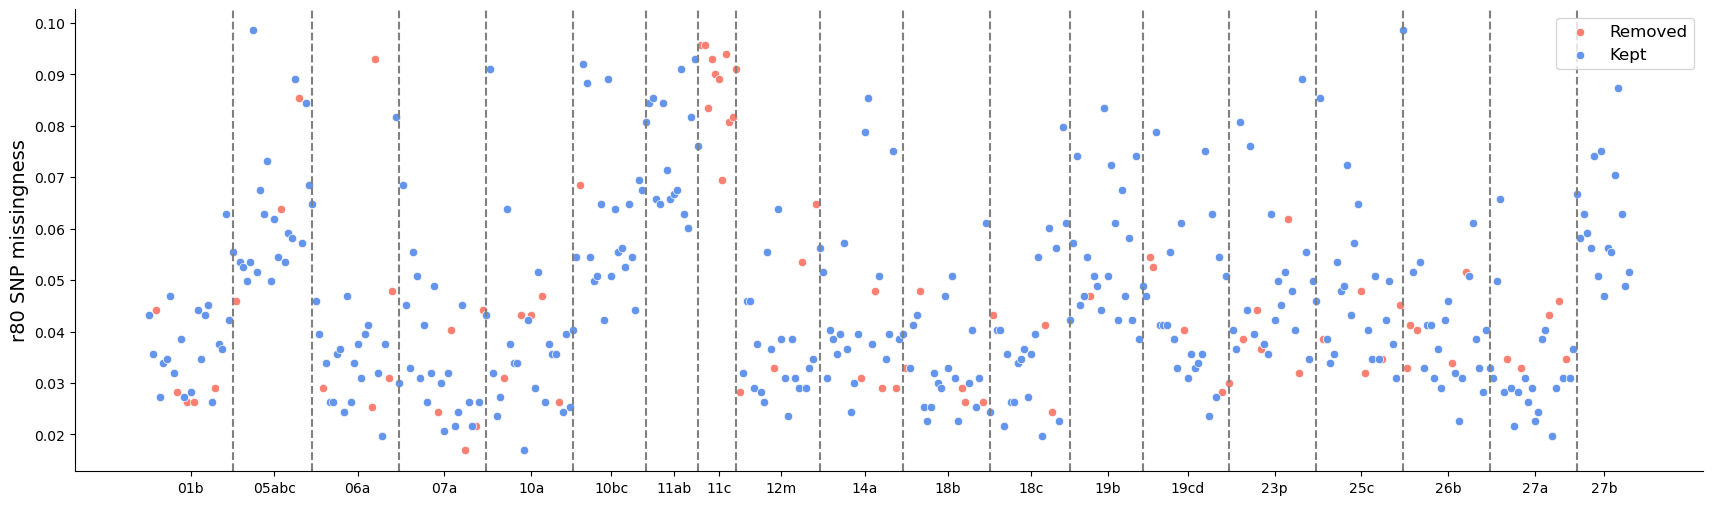

In [20]:
#filt6
#20 individuals per locality

#df_filt6_imiss=pd.DataFrame()
#for i in np.unique(df_filt5_imiss["POP"]):
#    tmp=df_filt5_imiss[df_filt5_imiss["POP"]==i]
#    if len(tmp)>=20:
#        tmp=tmp.sample(20)
#    df_filt6_imiss=pd.concat([df_filt6_imiss,tmp])
#df_filt6_imiss=df_filt6_imiss.reset_index(drop=True)
#df_filt6_imiss=df_filt6_imiss.sort_values("INDV")

popmap_filt6=pd.read_csv("popmap.filt6.tsv", sep='\t')
df_filt6_imiss=df_filt5_imiss[df_filt5_imiss['INDV'].isin(popmap_filt6['sample_prefix'])]

df_filt6=df_filt5[df_filt5['sample_prefix'].isin(df_filt6_imiss['INDV'])]
df_filt6[["sample_prefix","pop"]].to_csv('popmap.filt6.tsv', sep="\t", index=False)
df_filt6[["sample_prefix","LIBRARY"]].to_csv('libmap.filt6.tsv', sep="\t", index=False)

fig,ax=plt.subplots()
fig.set_size_inches(21,6)
sns.scatterplot(data=df_filt5_imiss,x="INDV",y="F_MISS",color="salmon",label="Removed",ax=ax)
sns.scatterplot(data=df_filt6_imiss,x="INDV",y="F_MISS",color="cornflowerblue",label="Kept",ax=ax)
ax.set_xlabel('',size=14)
ax.set_ylabel('r80 SNP missingness',size=14)
ax.legend(loc="upper right", fontsize=12)
vline_pos=df_filt5_imiss.tail(1)["INDV"]
xtick_pos=df_filt5_imiss.iloc[[int(len(df_filt5_imiss)/2)]]["INDV"]
for i in np.unique(df_filt5_imiss["POP"]):
    tmp=df_filt5_imiss[df_filt5_imiss["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1)["INDV"])
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]]["INDV"])
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax.axvline(x=i, color='gray', linestyle='--')
    xtick_lab = np.unique(df_filt5_imiss["POP"])
    ax.set_xticks(xtick_pos, xtick_lab)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


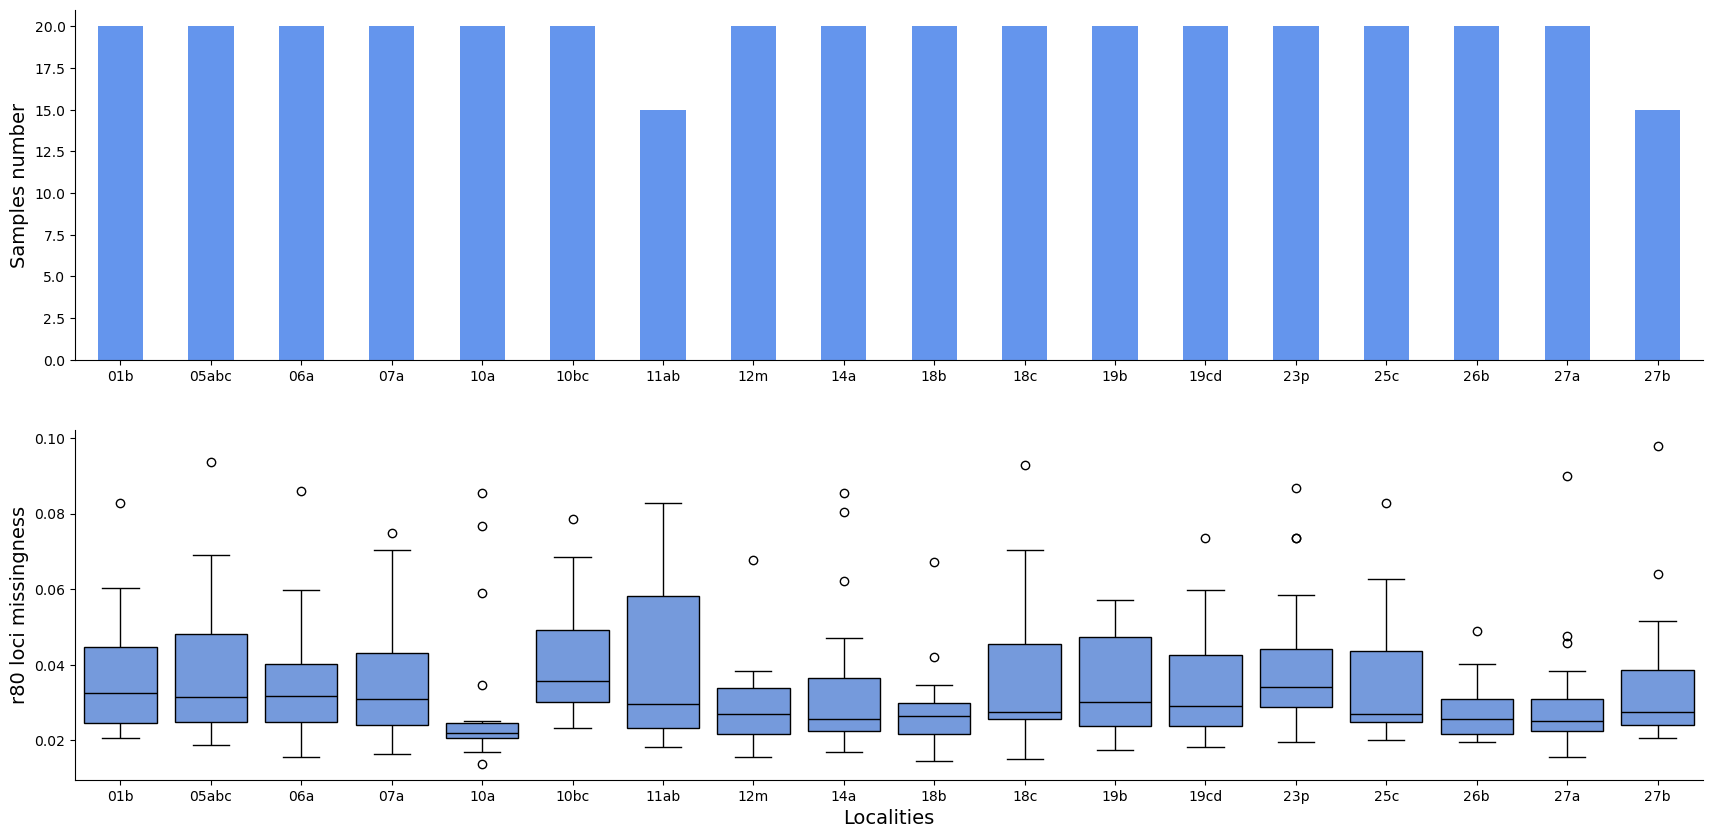

In [21]:
#filt6
#20 individuals per locality

#df_filt6_imiss=pd.DataFrame()
#for i in np.unique(df_filt5_imiss["POP"]):
#    tmp=df_filt5_imiss[df_filt5_imiss["POP"]==i]
#    if len(tmp)>=20:
#        tmp=tmp.sample(20)
#    df_filt6_imiss=pd.concat([df_filt6_imiss,tmp])
#df_filt6_imiss=df_filt6_imiss.reset_index(drop=True)
#df_filt6_imiss=df_filt6_imiss.sort_values("INDV")

popmap_filt6=pd.read_csv("popmap.filt6.tsv", sep='\t')
df_filt6_imiss=df_filt5_imiss[df_filt5_imiss['INDV'].isin(popmap_filt6['sample_prefix'])]

df_filt6=df_filt5[df_filt5['sample_prefix'].isin(df_filt6_imiss['INDV'])]
df_filt6[["sample_prefix","pop"]].to_csv('popmap.filt6.tsv', sep="\t", index=False)
df_filt6[["sample_prefix","LIBRARY"]].to_csv('libmap.filt6.tsv', sep="\t", index=False)

fig,ax=plt.subplots(2,1)
fig.set_size_inches(21,10)

population=[]
starting_individuals=[]
removed_indivduals=[]
kept_individuals=[]
for pop in np.unique(df_filt5["pop"]):
    population.append(pop)
    starting_individuals.append(len(df_filt5[df_filt5["pop"]==pop]))
    kept_inds=len(df_filt6[df_filt6["pop"]==pop])
    if (kept_inds!=0):
        kept_individuals.append(kept_inds)
        removed_indivduals.append(len(df_filt5[df_filt5["pop"]==pop])-kept_inds)
    else:
        kept_individuals.append(0)
        removed_indivduals.append(len(df_filt5[df_filt5["pop"]==pop])) 
removed_indivduals[1]=0
d = {'Populations': population, '20 individuals': kept_individuals}
ds = pd.DataFrame(data=d)
ds.plot(x="Populations",y="20 individuals",kind='bar',color='cornflowerblue',ax=ax[0])
ax[0].set_title('',size=20)
ax[0].set_ylabel('Samples number',size=14)
ax[0].set_xlabel('',size=14)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(axis='x', rotation=0)
ax[0].legend().remove()

df_filt6_imiss=pd.read_csv("filt6.imiss", sep='\t')
df_filt6_imiss=df_filt6_imiss[["INDV","F_MISS"]]
df_filt6_imiss["POP"]="01"
for i in range(0,len(df_filt6_imiss)):
    df_filt6_imiss["POP"][i]=df_filt6_imiss["INDV"][i].split("_")[0]

sns.boxplot(data=df_filt6_imiss,x="POP",y="F_MISS", color="cornflowerblue", linecolor="black",linewidth=1.0, ax=ax[1])
ax[1].set_xlabel('Localities',size=14)
ax[1].set_ylabel('r80 loci missingness',size=14)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend().remove()

pp.savefig(fig)

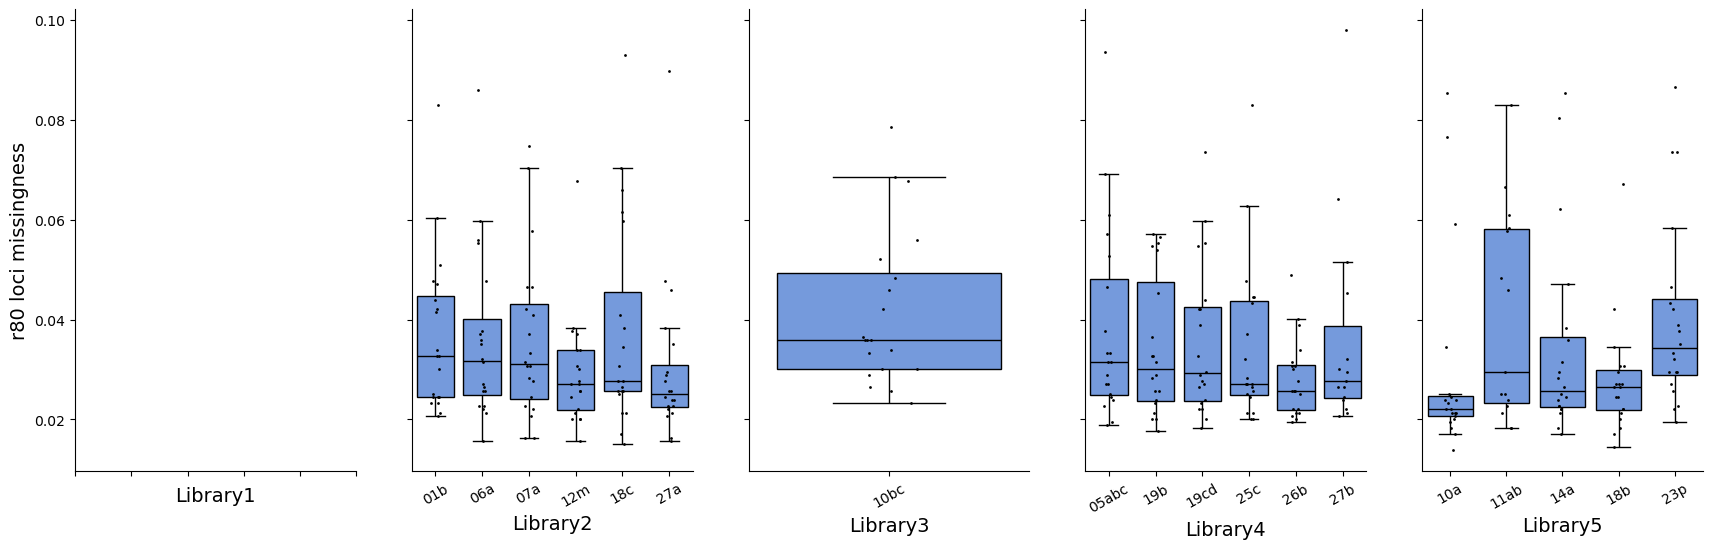

In [22]:
df_filt6_imiss=pd.read_csv("filt6.imiss", sep='\t')
df_filt6_imiss=df_filt6_imiss[["INDV","F_MISS"]]
df_filt6_imiss["POP"]="01"
for i in range(0,len(df_filt6_imiss)):
    df_filt6_imiss["POP"][i]=df_filt6_imiss["INDV"][i].split("_")[0]
df_filt6_imiss["LIBRARY"]=df_filt6["LIBRARY"].tolist()

fig,ax=plt.subplots(1,5,sharey=True)
fig.set_size_inches(21,6)
counter=0
for i in ["Library1","Library2","Library3","Library4","Library5"]:
    tmp=df_filt6_imiss[df_filt6_imiss["LIBRARY"]==i]
    sns.boxplot(data=tmp,x="POP",y="F_MISS", color="cornflowerblue", linecolor="black", showfliers=False, ax=ax[counter])
    sns.stripplot(data=tmp,x="POP",y="F_MISS",color="black", jitter=0.1, size=2, ax=ax[counter])
    ax[counter].set_xlabel(i,size=14)
    ax[counter].set_xticklabels(np.unique(tmp["POP"]), rotation = 30)
    ax[counter].spines['top'].set_visible(False)
    ax[counter].spines['right'].set_visible(False)
    counter=counter+1
ax[0].set_ylabel('r80 loci missingness',size=14)
plt.show()